In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('hfi_cc_2018.csv')

In [3]:
df.head()

year ISO_code  countries                         region  pf_rol_procedural  \
0  2016      ALB    Albania                 Eastern Europe           6.661503   
1  2016      DZA    Algeria     Middle East & North Africa                NaN   
2  2016      AGO     Angola             Sub-Saharan Africa                NaN   
3  2016      ARG  Argentina  Latin America & the Caribbean           7.098483   
4  2016      ARM    Armenia        Caucasus & Central Asia                NaN   

   pf_rol_civil  pf_rol_criminal    pf_rol  pf_ss_homicide  \
0      4.547244         4.666508  5.291752        8.920429   
1           NaN              NaN  3.819566        9.456254   
2           NaN              NaN  3.451814        8.060260   
3      5.791960         4.343930  5.744791        7.622974   
4           NaN              NaN  5.003205        8.808750   

   pf_ss_disappearances_disap  ...  ef_regulation_business_bribes  \
0                        10.0  ...                       4.050196   
1                        10.0  ...                       3.765515   
2                         5.0  ...                       1.945540   
3                        10.0  ...                       3.260044   
4                        10.0  ...                       4.575152   

   ef_regulation_business_licensing  ef_regulation_business_compliance  \
0                          7.324582                           7.074366   
1                          8.523503                           7.029528   
2                          8.096776                           6.782923   
3                          5.253411                           6.508295   
4                          9.319612                           6.491481   

   ef_regulation_business  ef_regulation  ef_score  ef_rank  hf_score  \
0                6.705863       6.906901      7.54     34.0  7.568140   
1                5.676956       5.268992      4.99    159.0  5.135886   
2                4.930271       5.518500      5.17    155.0  5.640662   
3                5.535831       5.369019      4.84    160.0  6.469848   
4                6.797530       7.378069      7.57     29.0  7.241402   

   hf_rank  hf_quartile  
0     48.0          2.0  
1    155.0          4.0  
2    142.0          4.0  
3    107.0          3.0  
4     57.0          2.0  

[5 rows x 123 columns]

In [4]:
(df.isnull().sum()/len(df)*100).sort_values(ascending = False)

pf_identity_legal                85.939643
pf_identity_divorce              59.876543
pf_association_prof_establish    50.137174
pf_religion_estop_establish      50.137174
pf_association_sport_operate     50.137174
                                   ...    
ef_legal_gender                   1.646091
region                            0.000000
countries                         0.000000
ISO_code                          0.000000
year                              0.000000
Length: 123, dtype: float64

In [5]:
df1 = df.copy()

In [6]:
dropped = df1.drop(['ISO_code','year','countries','region','pf_rol','pf_ss_disappearances','pf_rol','pf_ss_women',
'pf_ss','pf_movement','pf_religion', 'pf_association','pf_expression','pf_identity', 'ef_government','ef_legal', 
'ef_money','ef_trade_tariffs', 'ef_trade_regulatory','ef_trade_movement','ef_trade','ef_regulation_credit',
'ef_regulation_labor','ef_regulation_business','pf_identity_sex',
'ef_regulation','ef_score','ef_rank','hf_rank','hf_quartile','pf_score','pf_rank',
'pf_ss_women_inheritance','pf_religion_estop','pf_association_prof','pf_identity_parental','ef_government_tax',
'pf_association_political','pf_association_sport','pf_association_political','pf_identity_legal'],axis =1)

In [7]:
null = dropped[dropped['hf_score'].isnull()]

In [8]:
notnull = dropped[dropped['hf_score'].notnull()]

In [9]:
(notnull.isnull().sum()/len(notnull)*100).sort_values(ascending = False)

pf_identity_divorce                   57.54717
pf_association_political_establish    47.24238
pf_association_sport_operate          47.24238
pf_association_sport_establish        47.24238
pf_association_prof_operate           47.24238
                                        ...   
pf_expression_control                  0.00000
ef_legal_gender                        0.00000
pf_identity_sex_female                 0.00000
ef_government_consumption              0.00000
hf_score                               0.00000
Length: 84, dtype: float64

In [10]:
from missingpy import KNNImputer
impu=KNNImputer()
notnullknn=impu.fit_transform(notnull)
final=pd.DataFrame(notnullknn,columns=notnull.columns,index=notnull.index)

C:\Users\Harii\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Harii\Anaconda3\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
C:\Users\Harii\Anaconda3\lib\site-packages\missingpy\utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [11]:
(final.isnull().sum()/len(final)*100).sort_values(ascending = False)

hf_score                              0.0
pf_expression_influence               0.0
pf_association_political_establish    0.0
pf_association_political_operate      0.0
pf_association_prof_establish         0.0
                                     ... 
ef_money_inflation                    0.0
ef_money_currency                     0.0
ef_trade_tariffs_revenue              0.0
ef_trade_tariffs_mean                 0.0
pf_rol_procedural                     0.0
Length: 84, dtype: float64

In [12]:
x = final.drop('hf_score',axis = 1)
y = final['hf_score']

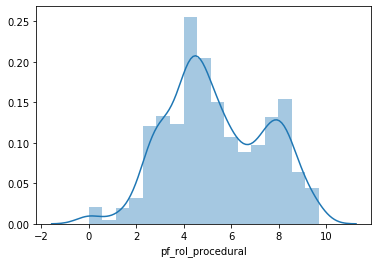

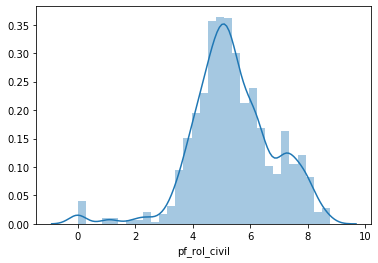

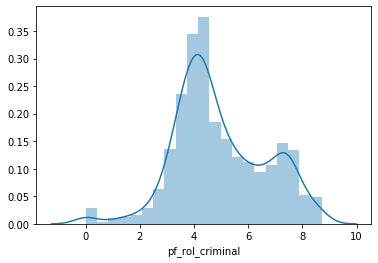

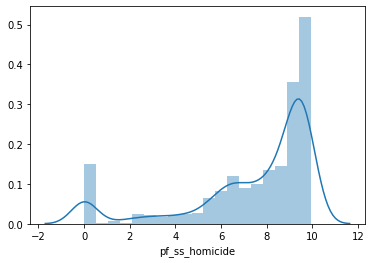

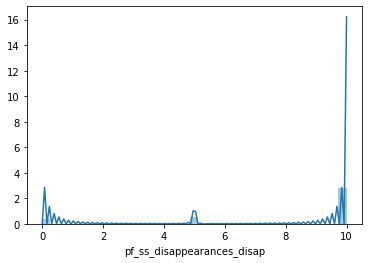

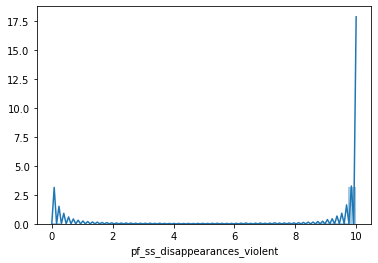

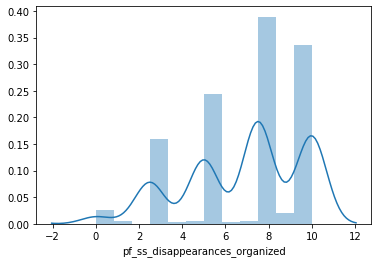

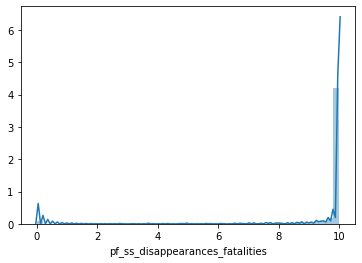

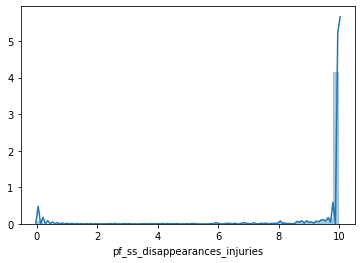

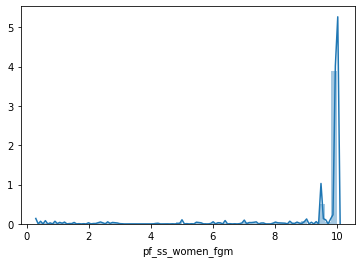

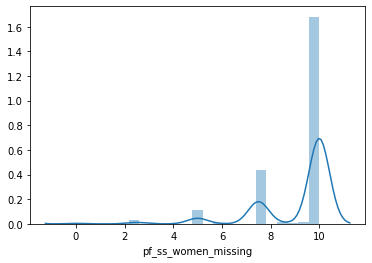

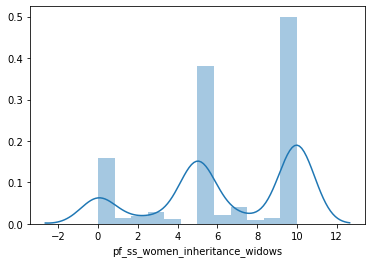

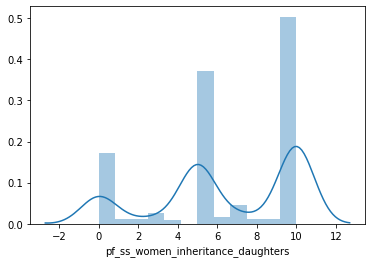

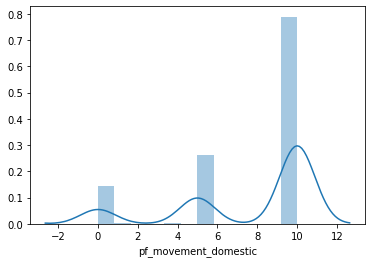

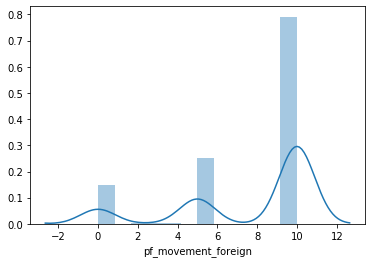

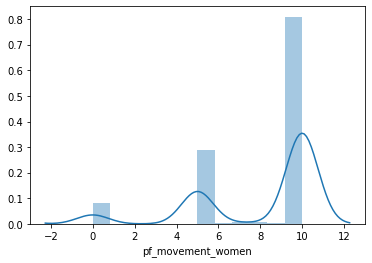

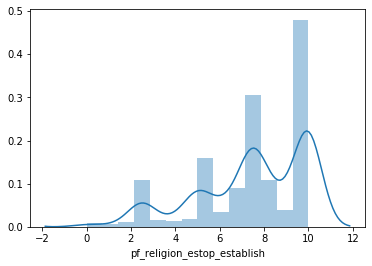

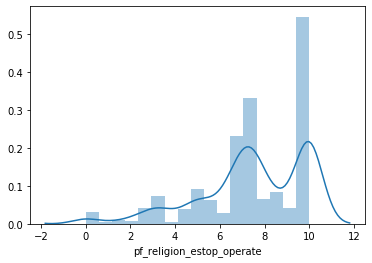

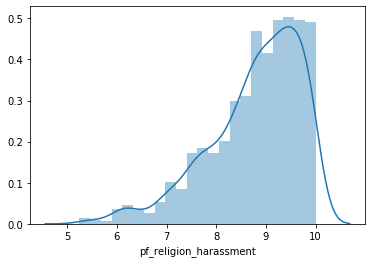

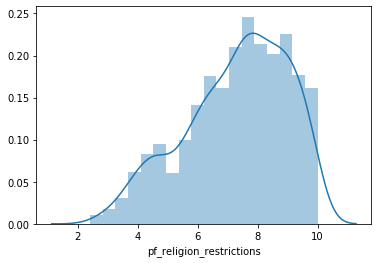

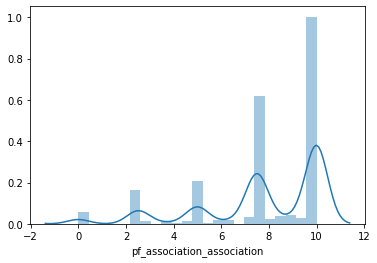

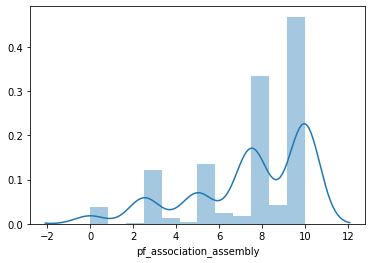

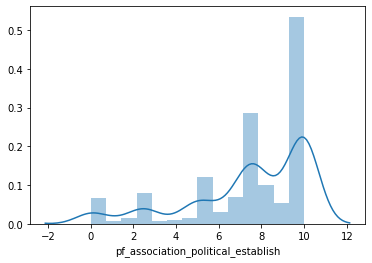

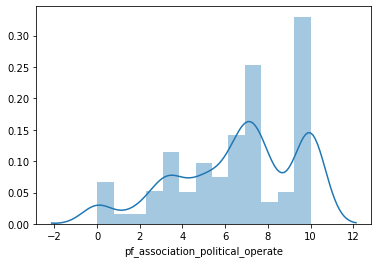

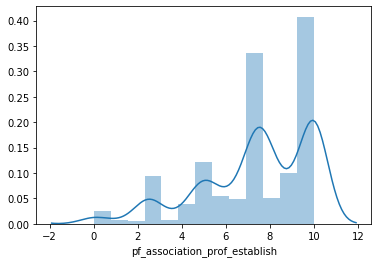

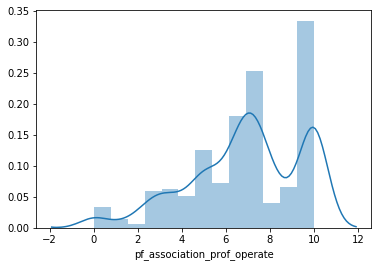

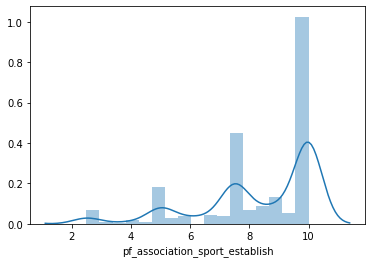

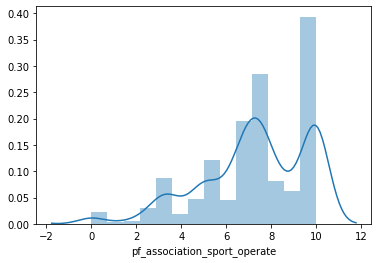

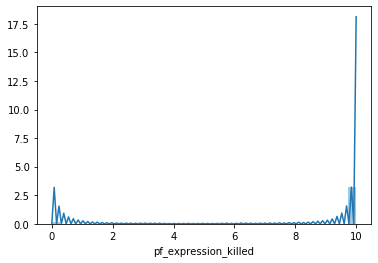

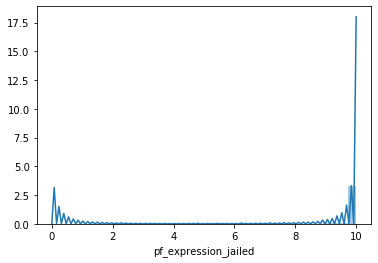

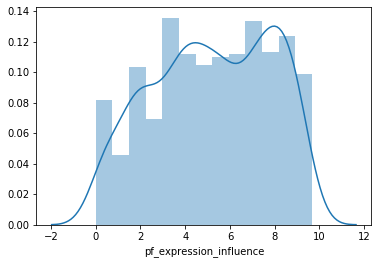

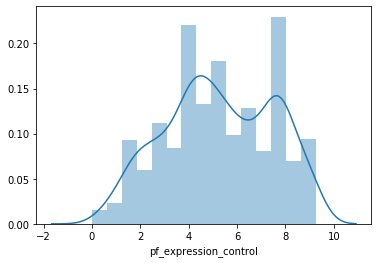

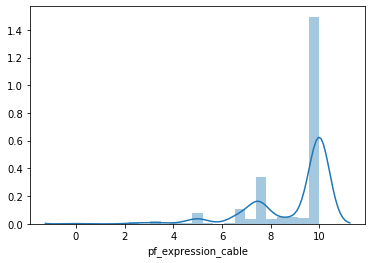

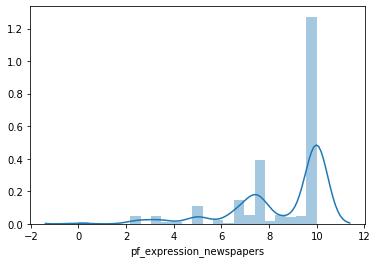

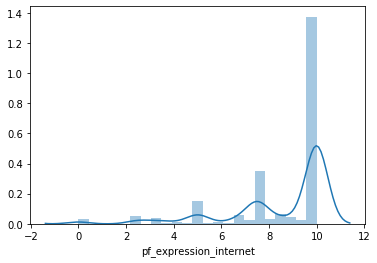

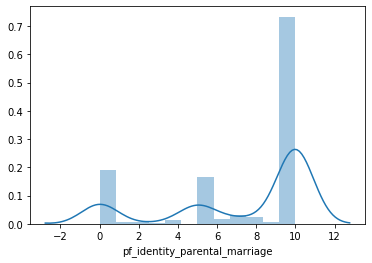

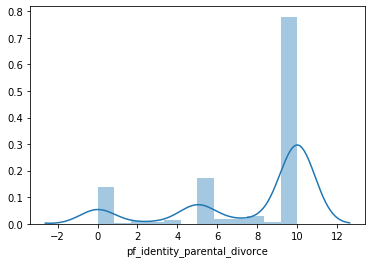

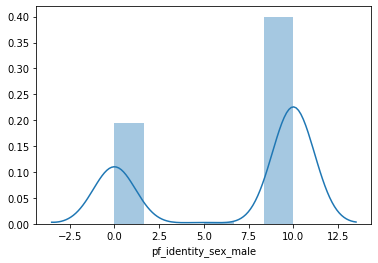

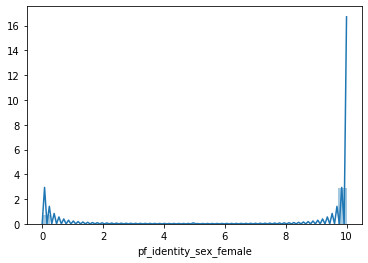

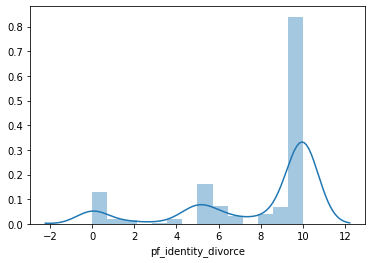

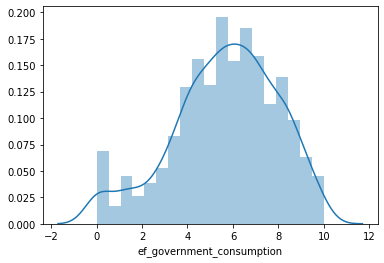

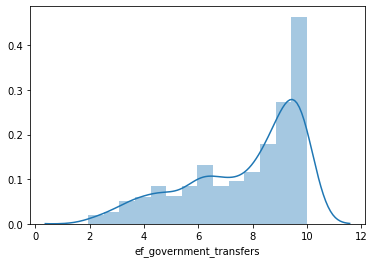

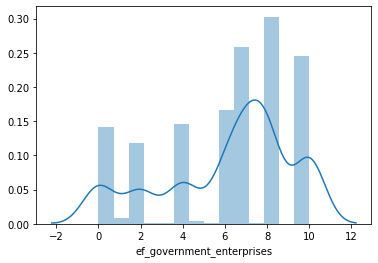

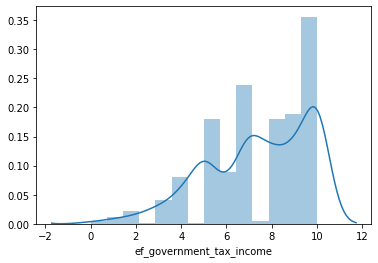

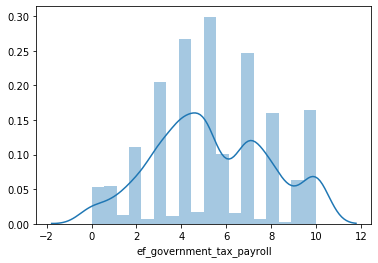

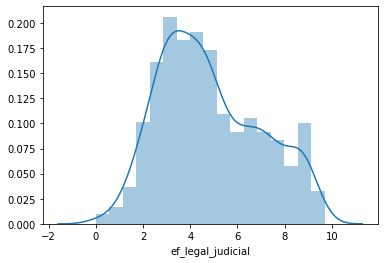

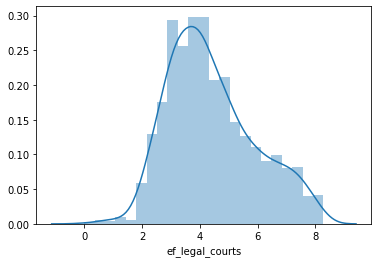

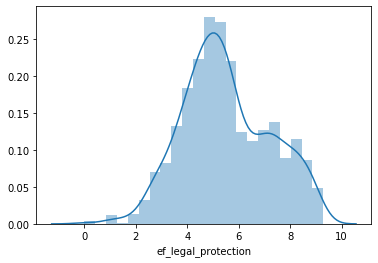

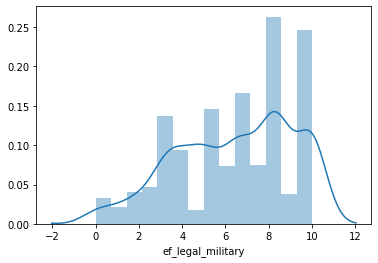

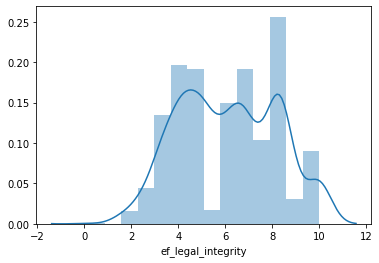

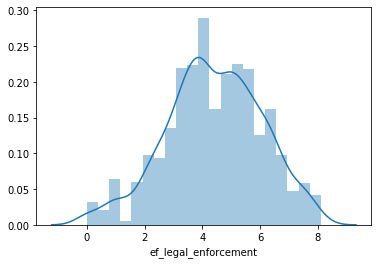

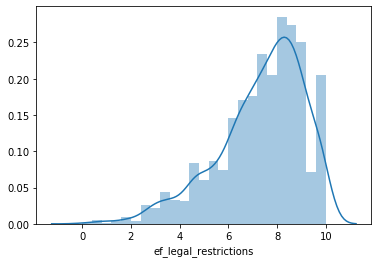

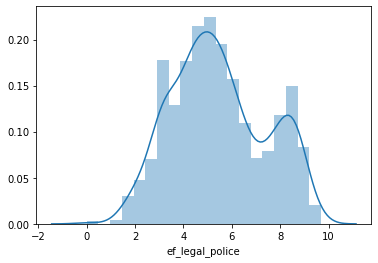

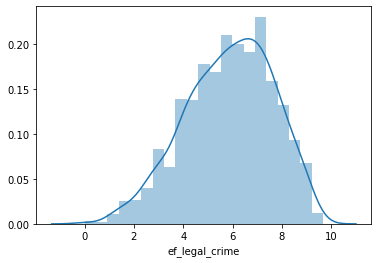

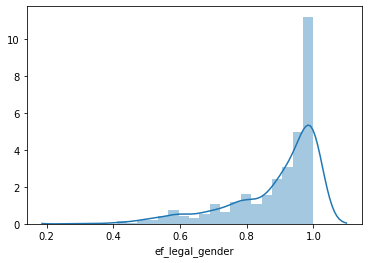

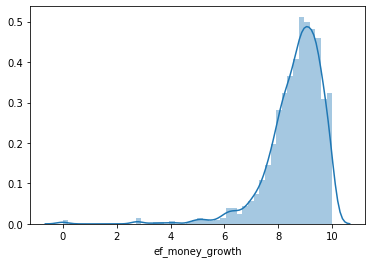

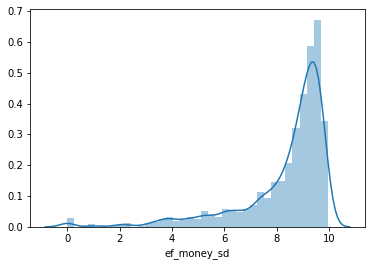

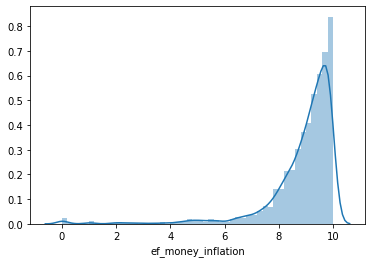

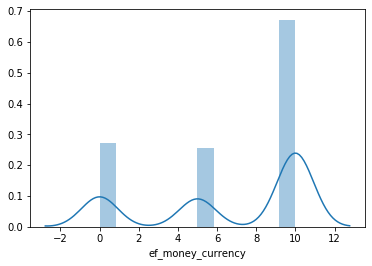

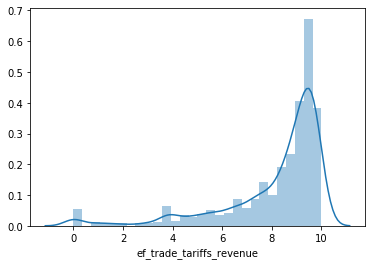

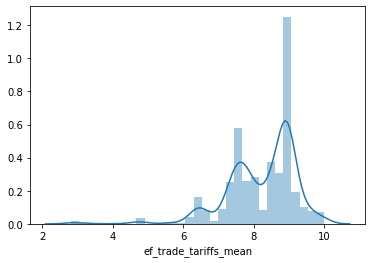

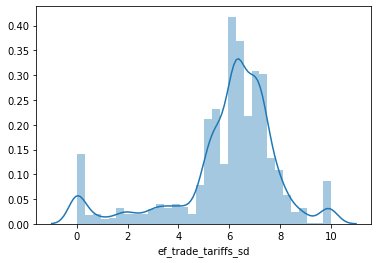

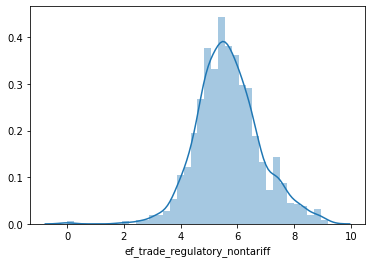

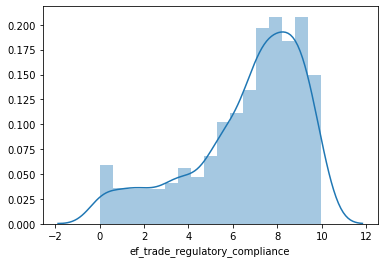

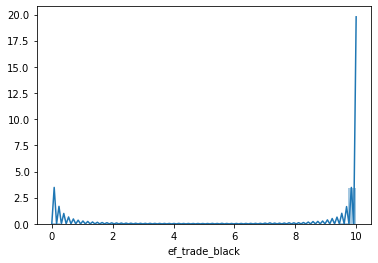

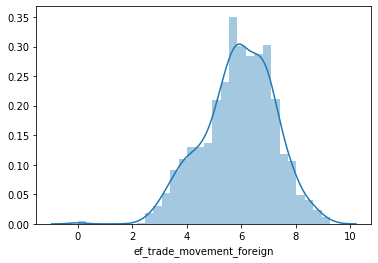

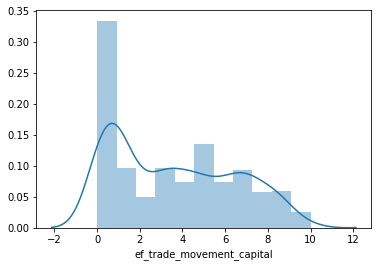

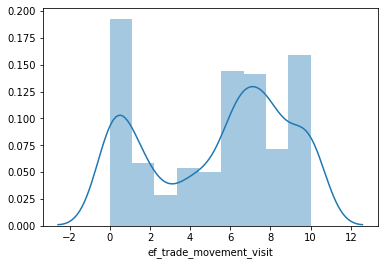

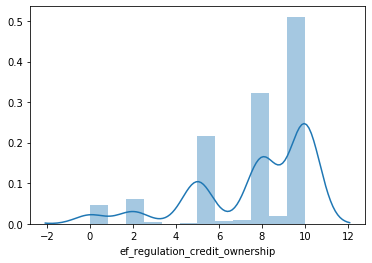

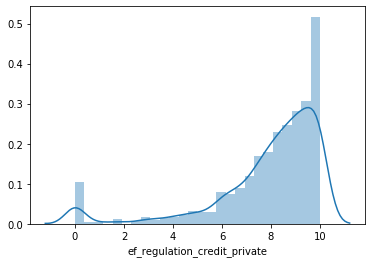

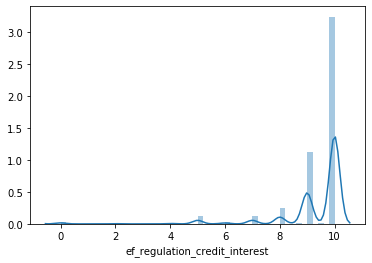

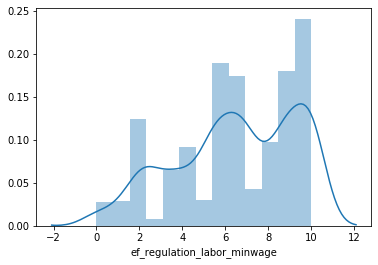

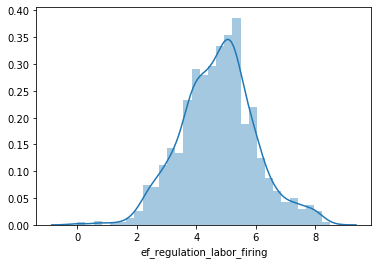

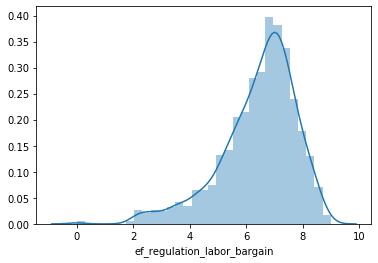

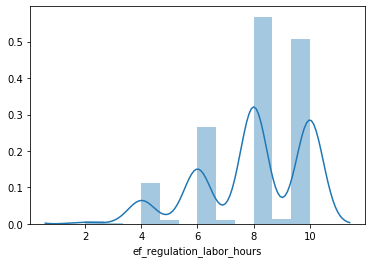

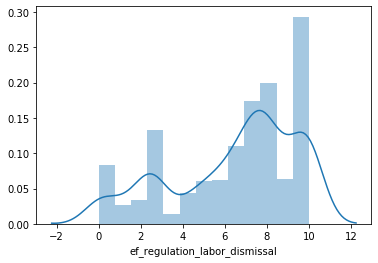

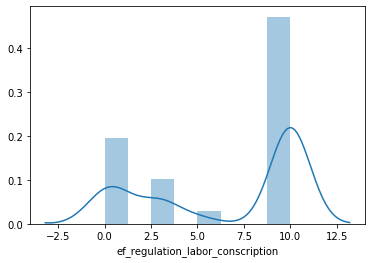

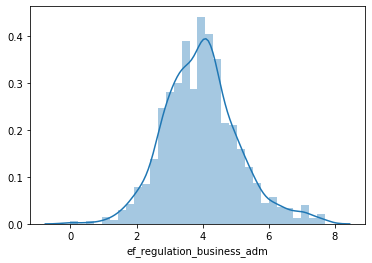

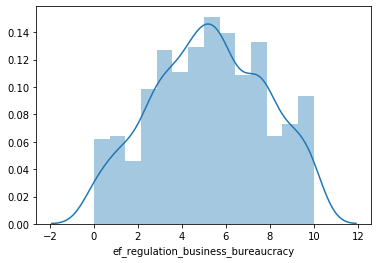

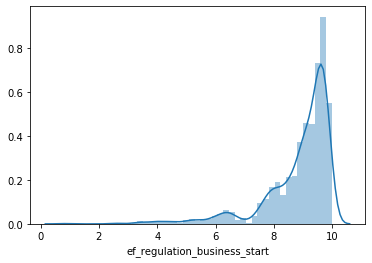

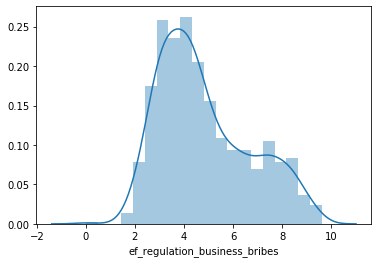

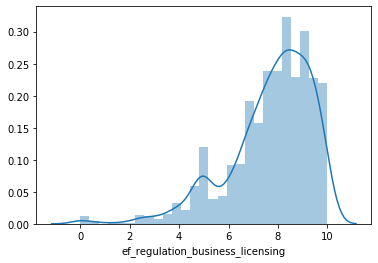

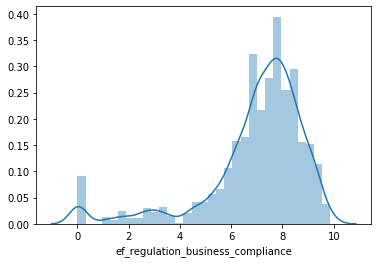

In [13]:
import seaborn as sb
import matplotlib.pyplot as plt

for i in x.columns:
    sb.distplot(x[i])
    plt.show()

In [14]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
inp_pt=pt.fit_transform(x)
inp_pt=pd.DataFrame(x,columns=x.columns)

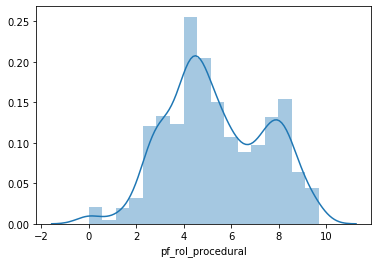

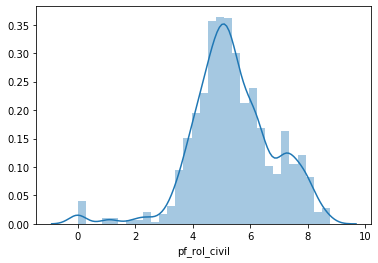

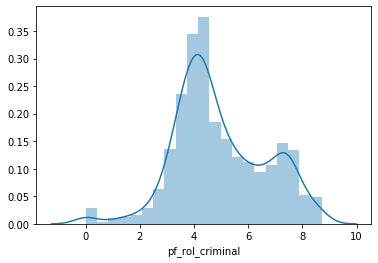

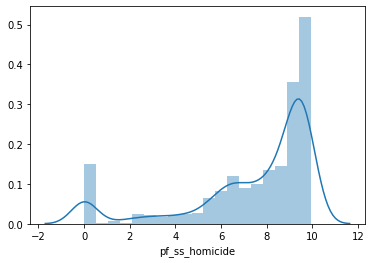

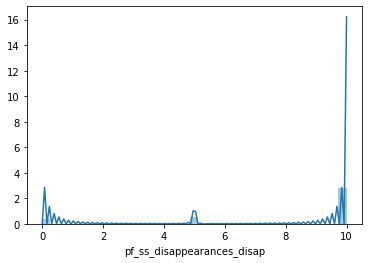

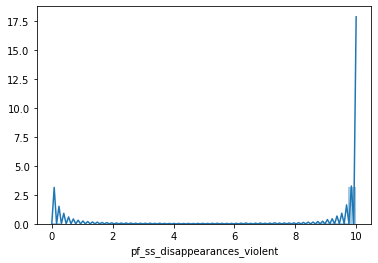

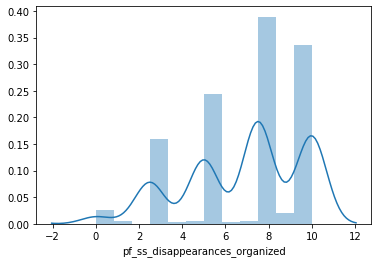

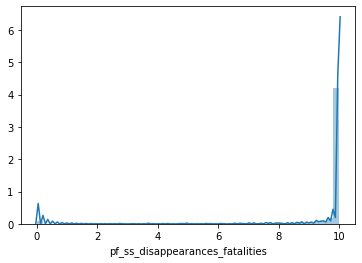

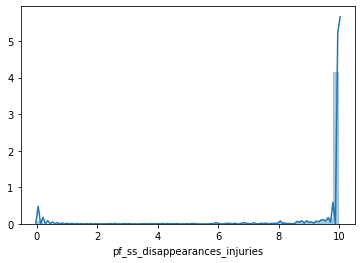

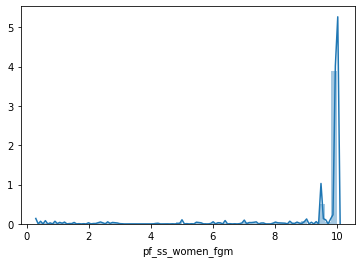

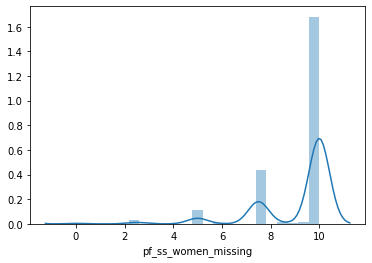

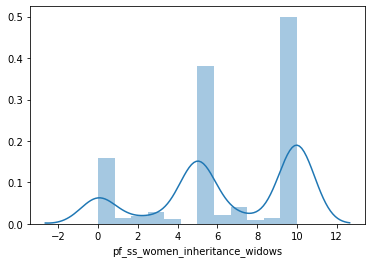

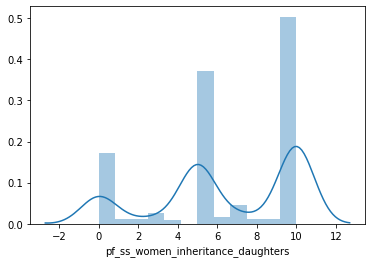

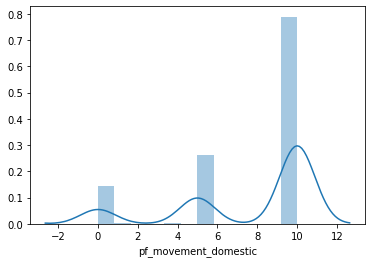

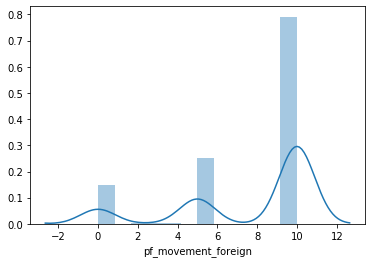

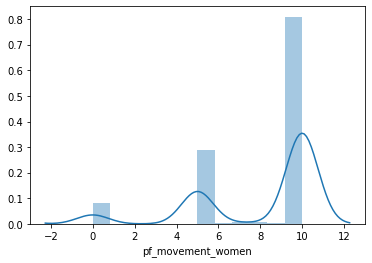

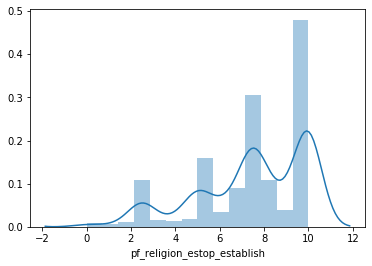

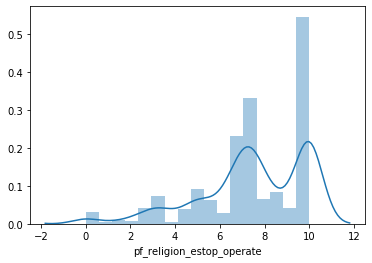

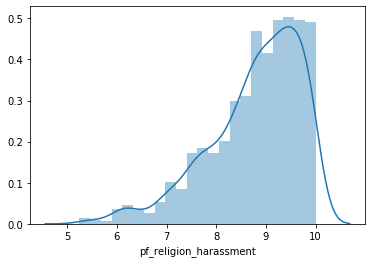

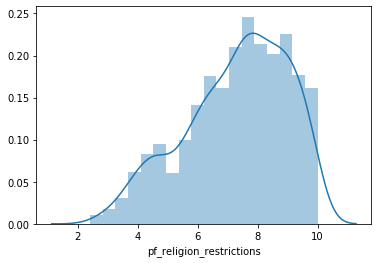

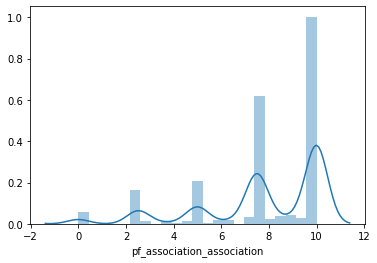

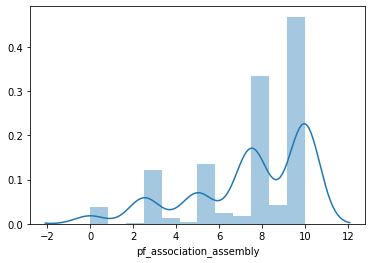

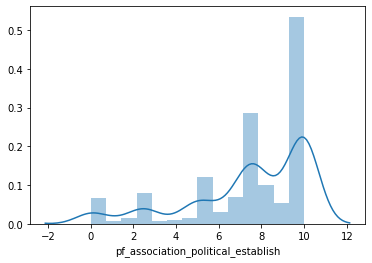

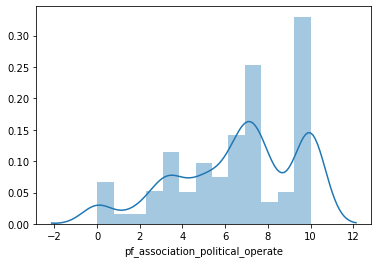

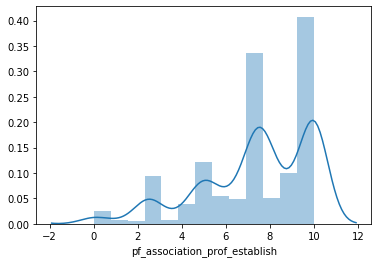

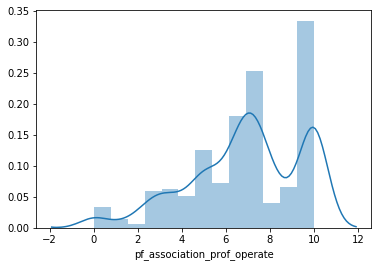

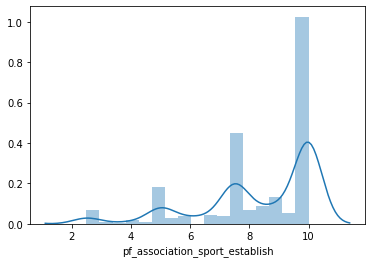

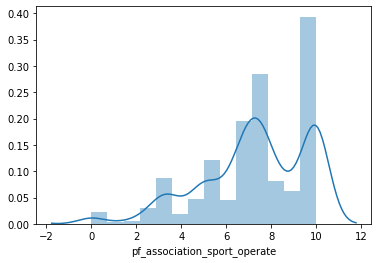

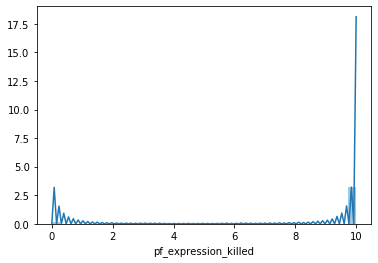

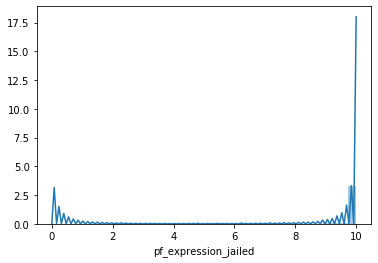

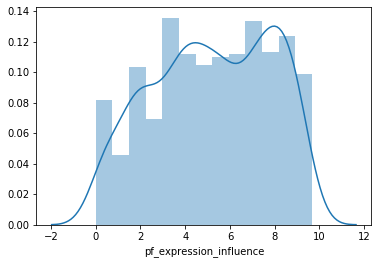

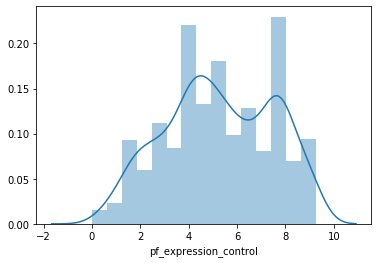

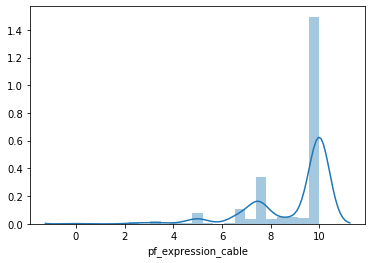

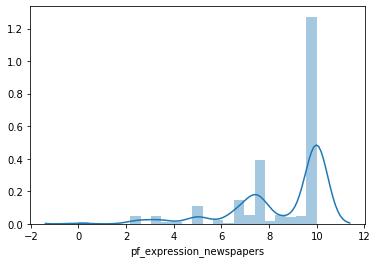

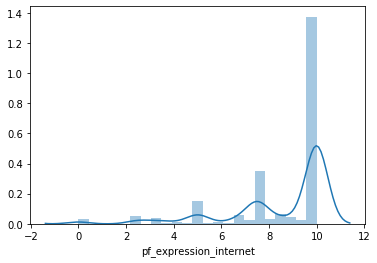

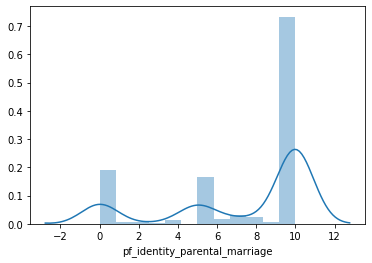

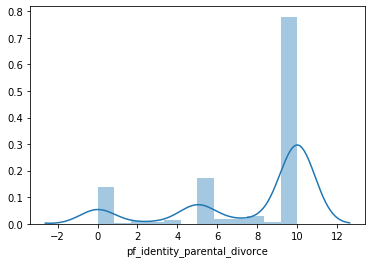

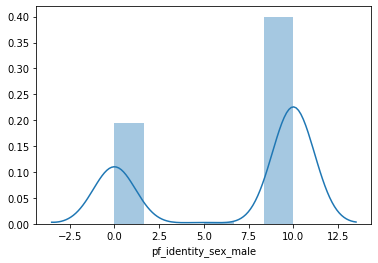

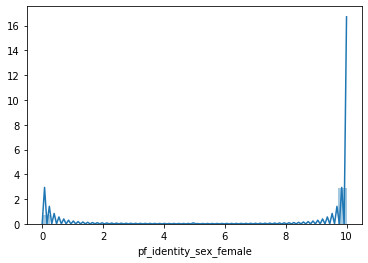

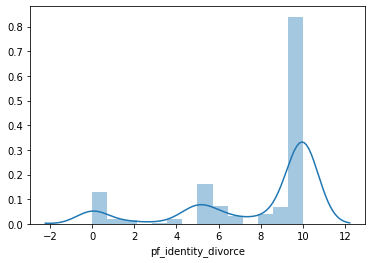

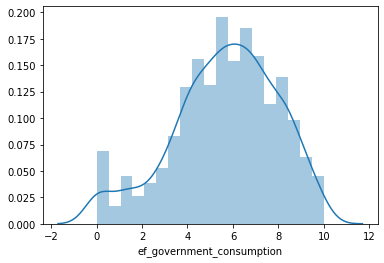

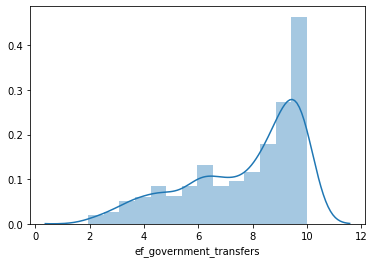

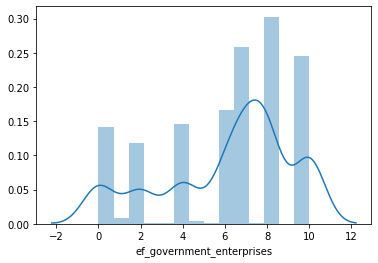

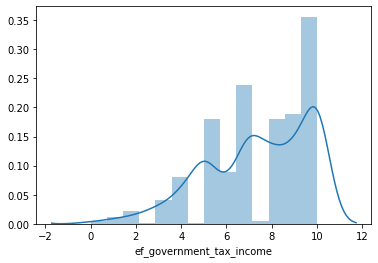

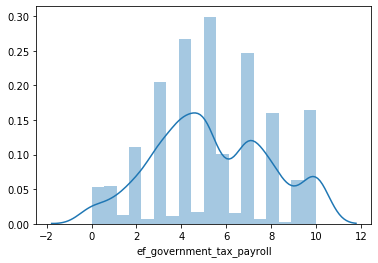

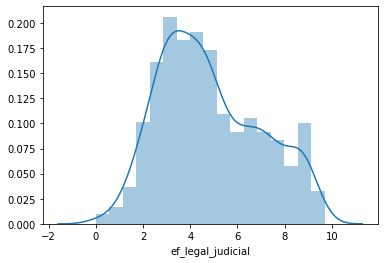

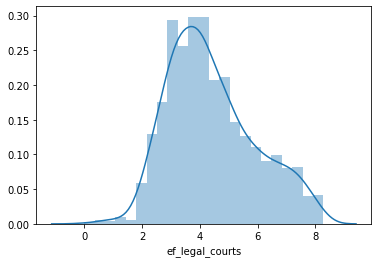

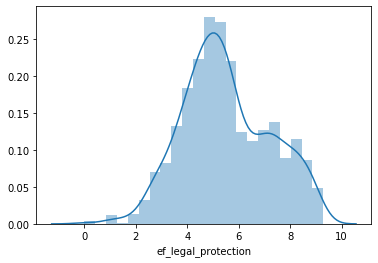

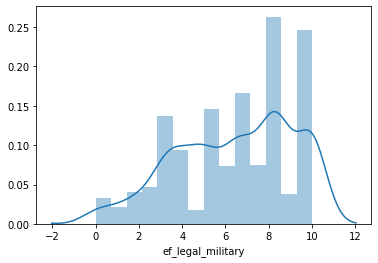

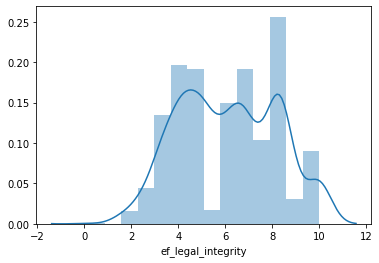

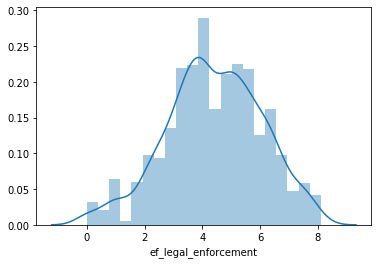

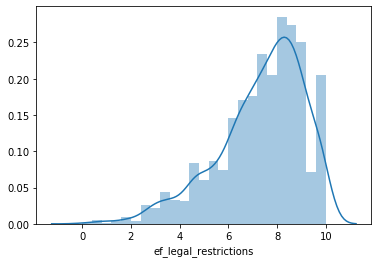

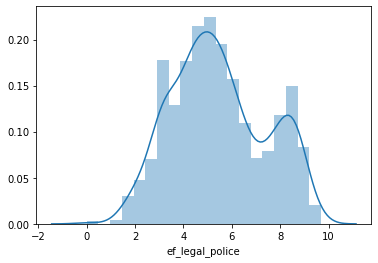

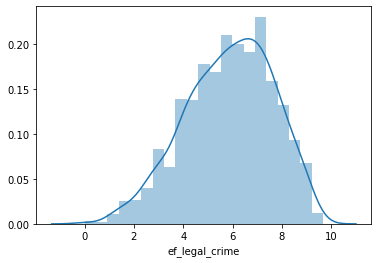

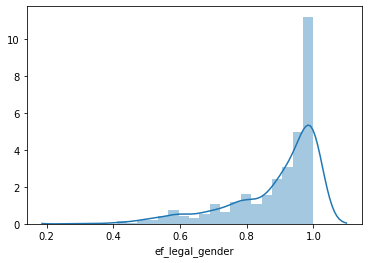

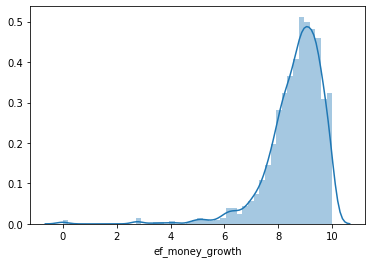

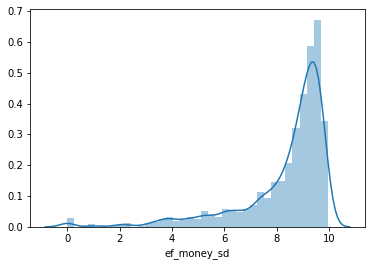

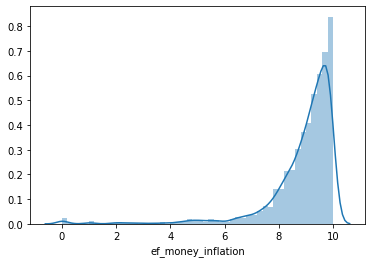

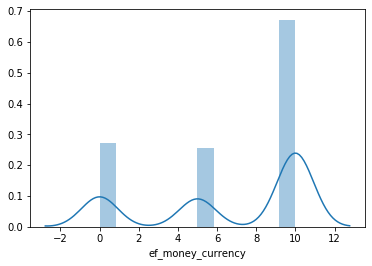

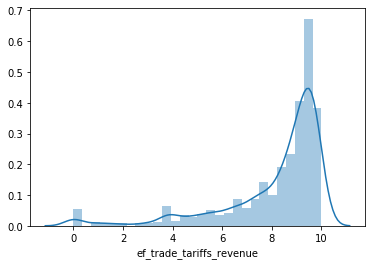

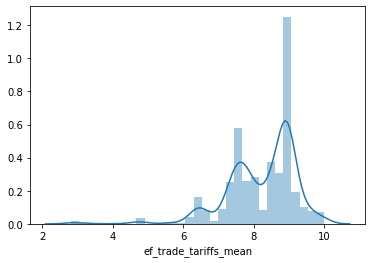

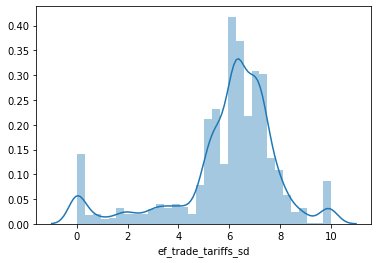

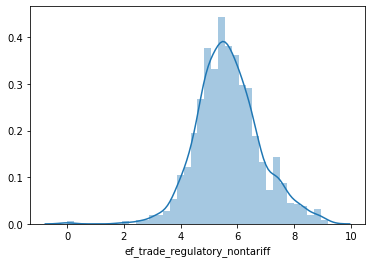

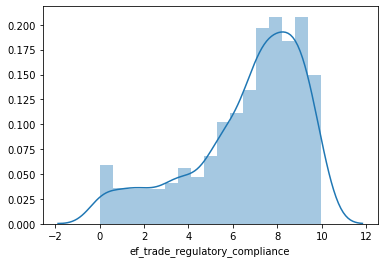

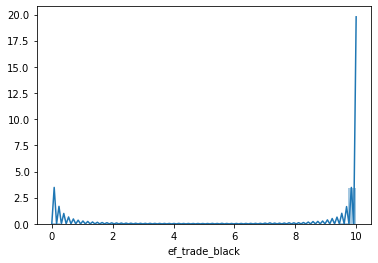

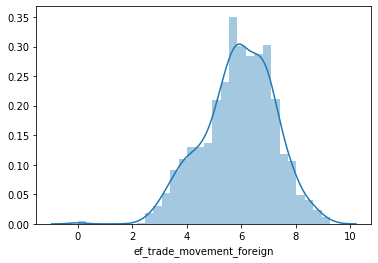

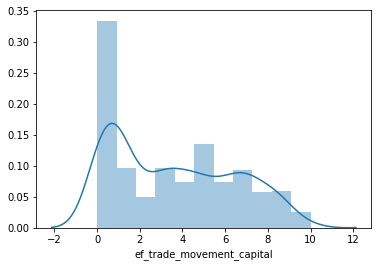

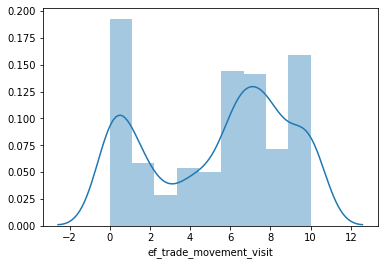

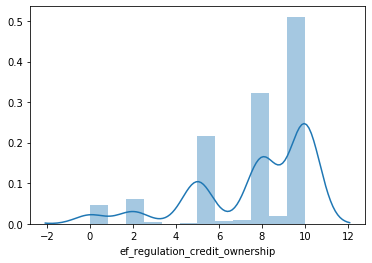

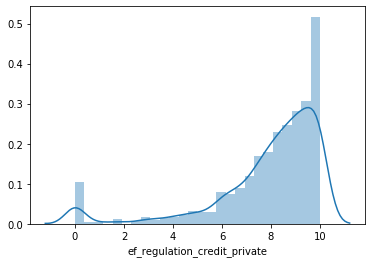

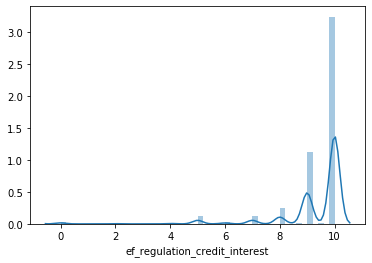

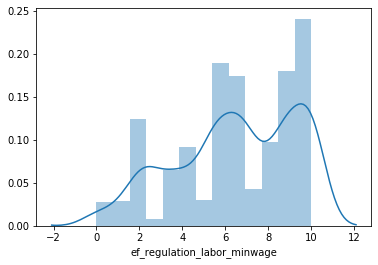

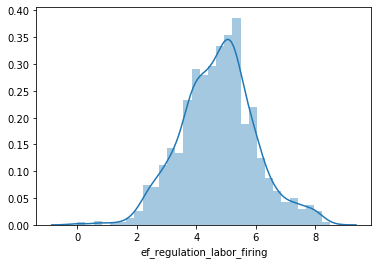

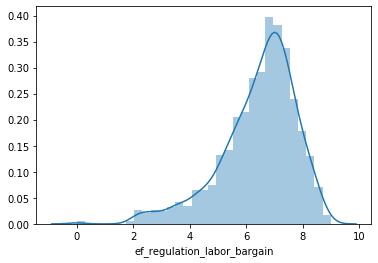

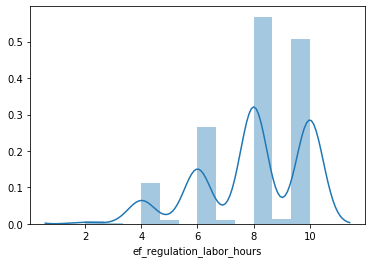

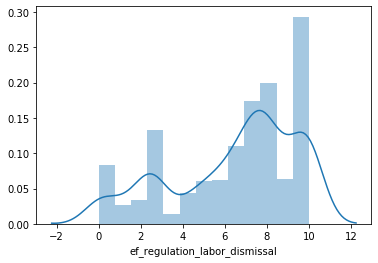

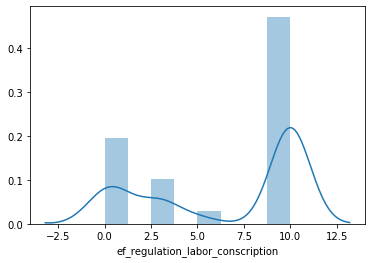

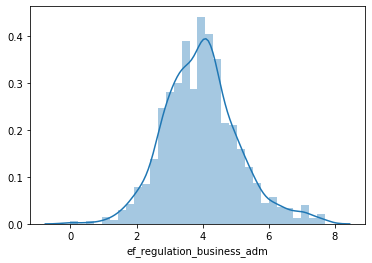

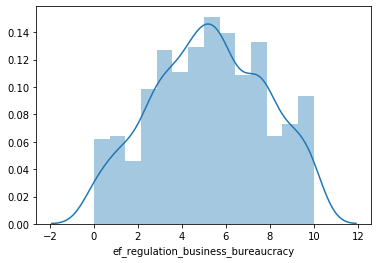

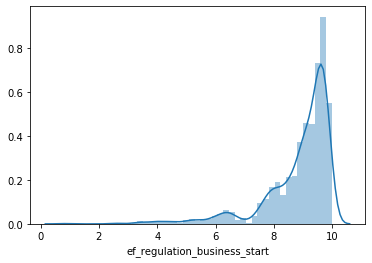

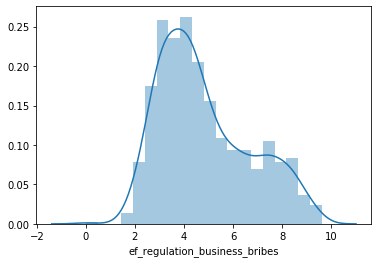

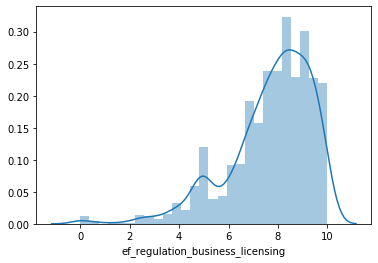

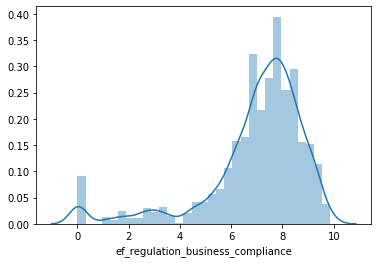

In [15]:
import seaborn as sb
import matplotlib.pyplot as plt

for i in inp_pt.columns:
    sb.distplot(inp_pt[i])
    plt.show()

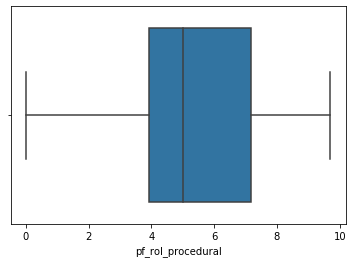

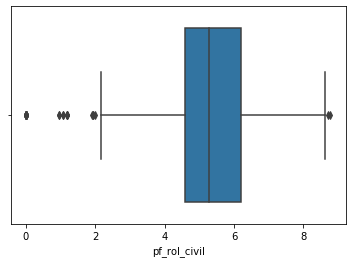

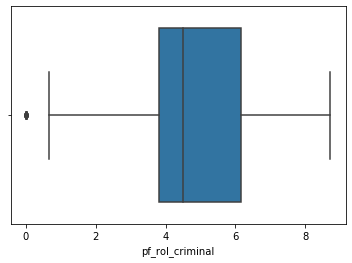

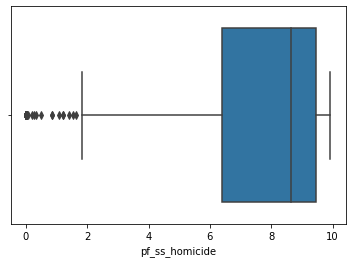

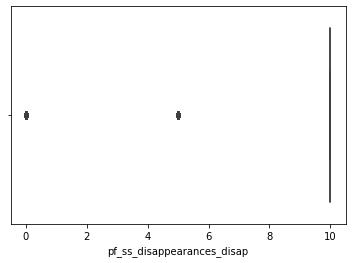

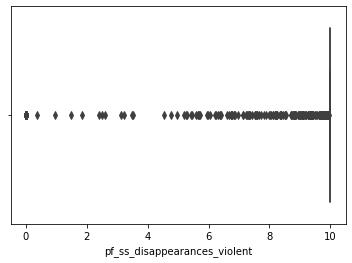

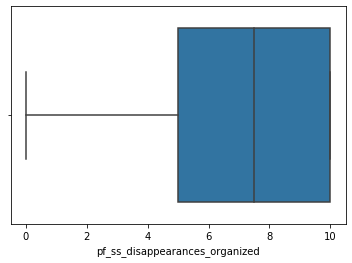

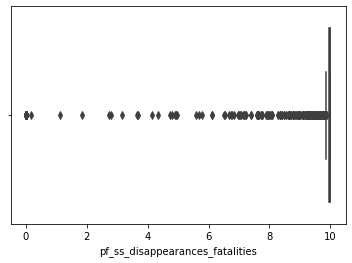

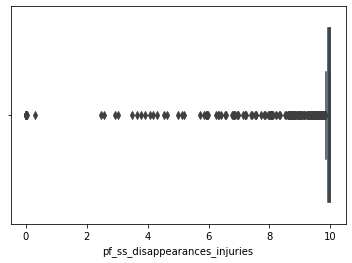

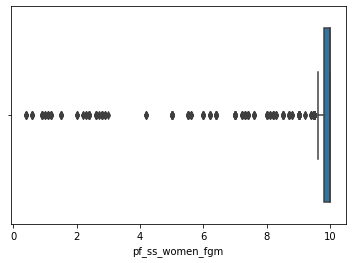

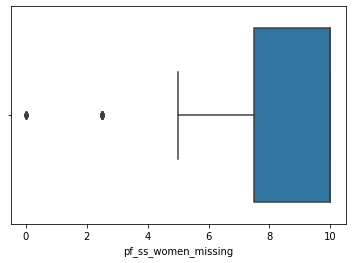

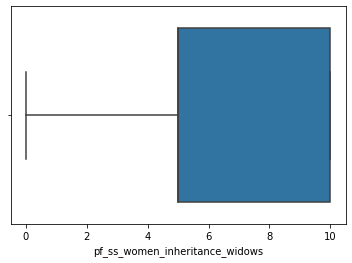

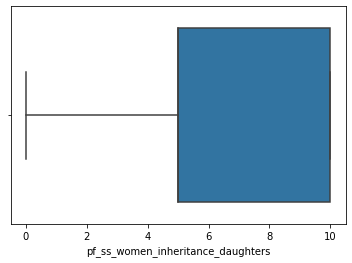

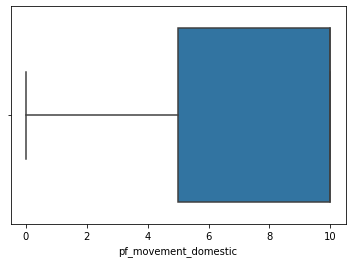

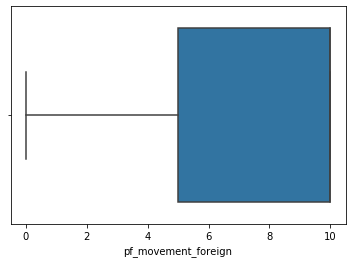

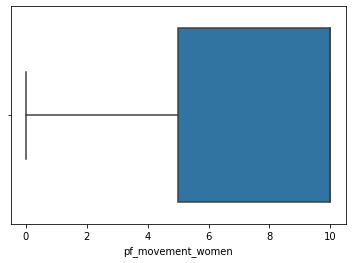

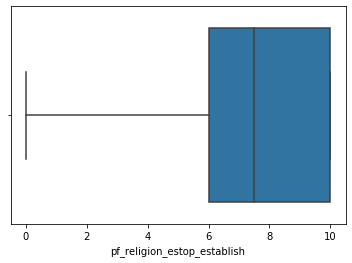

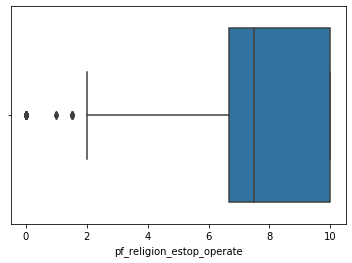

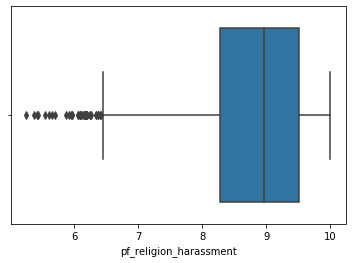

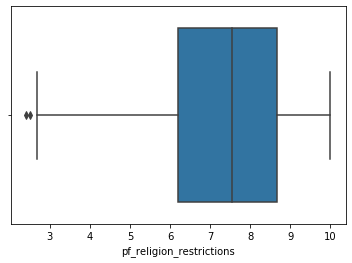

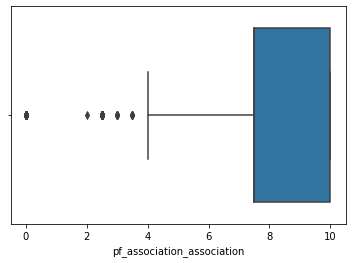

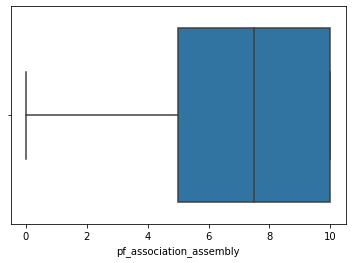

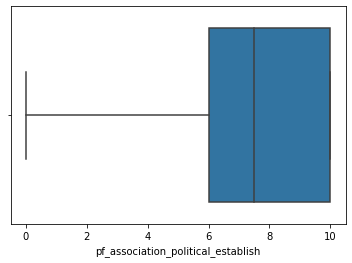

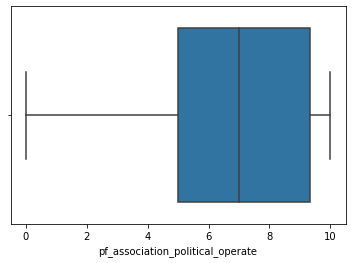

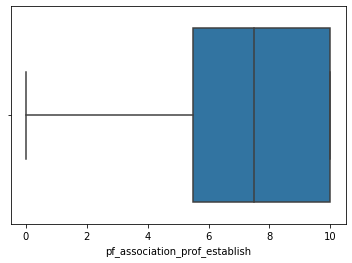

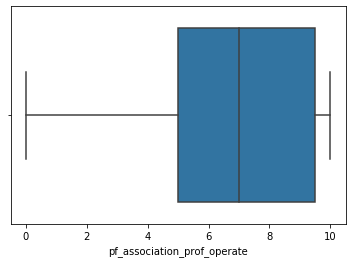

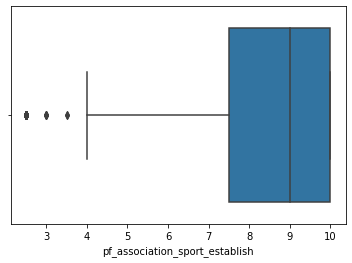

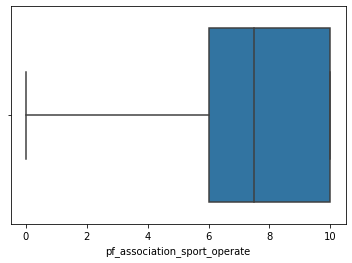

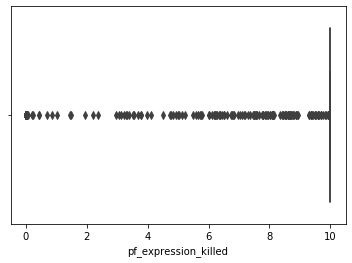

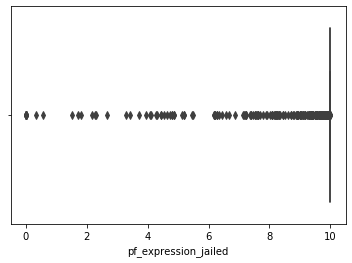

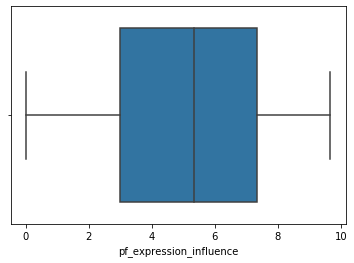

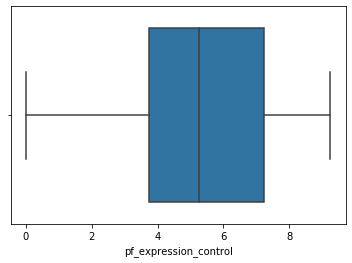

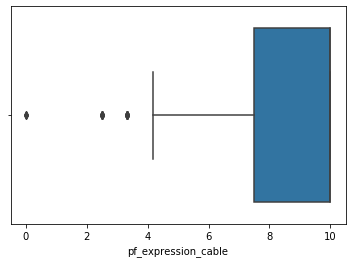

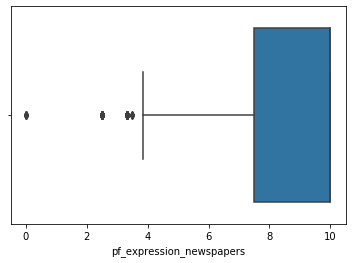

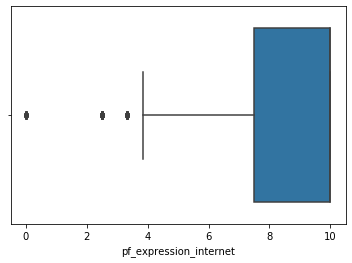

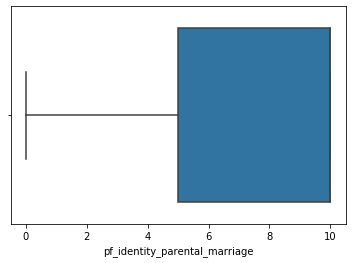

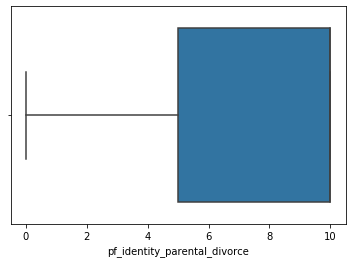

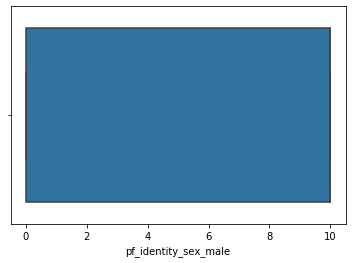

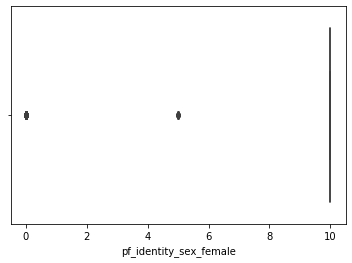

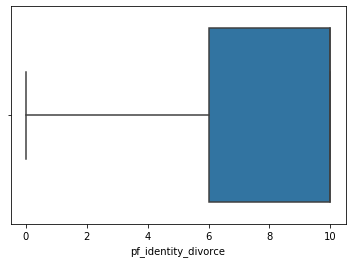

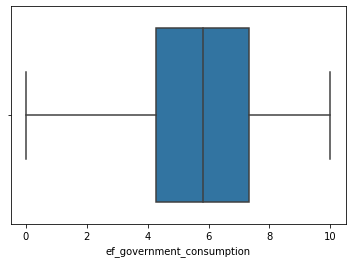

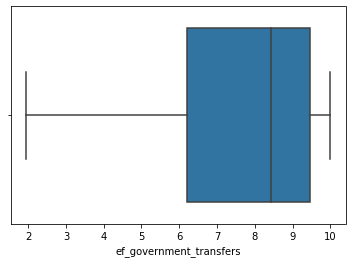

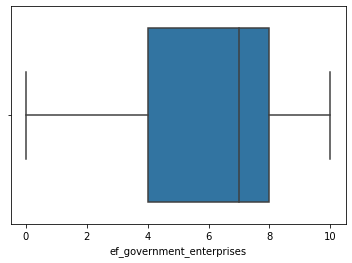

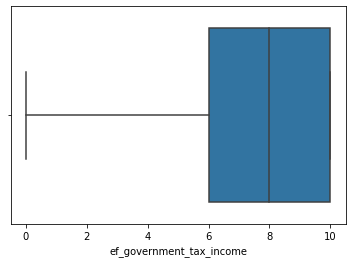

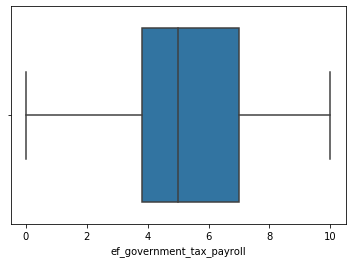

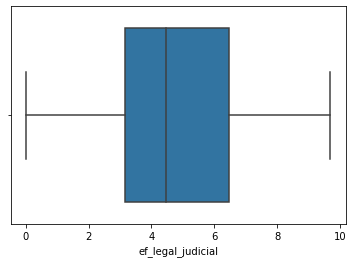

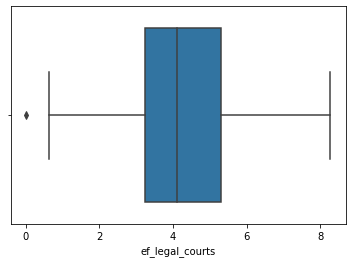

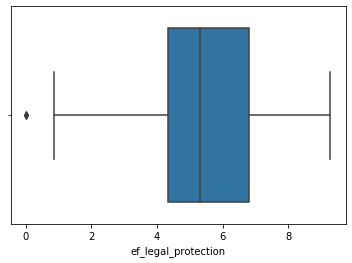

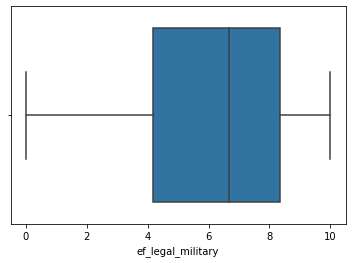

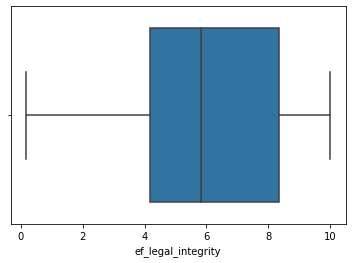

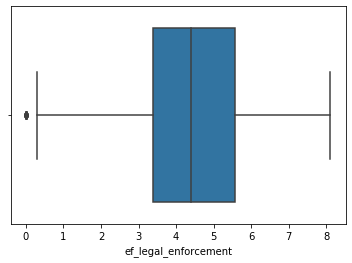

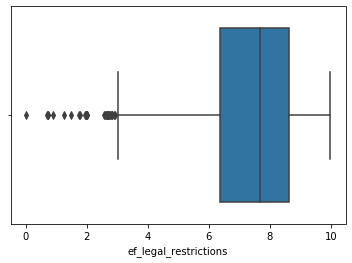

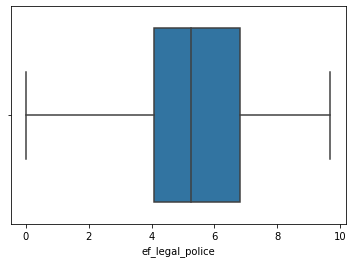

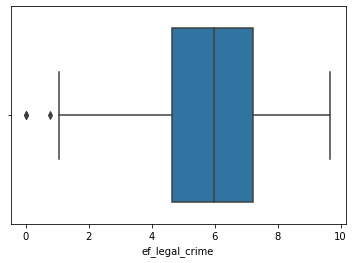

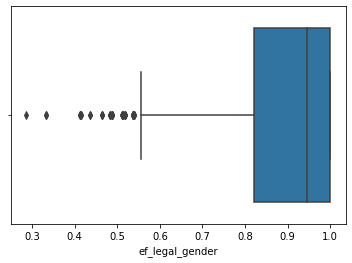

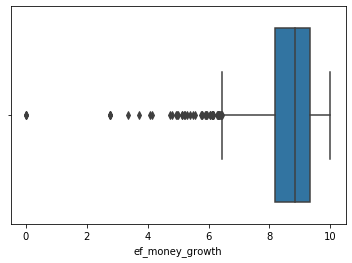

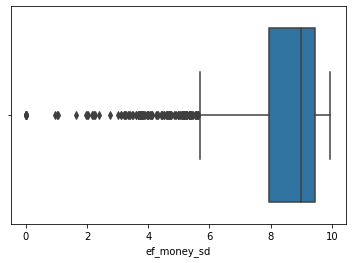

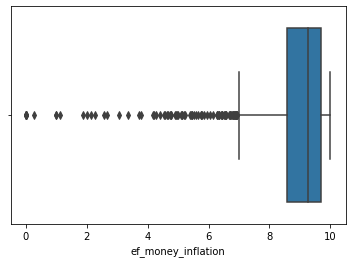

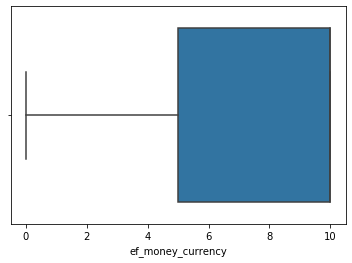

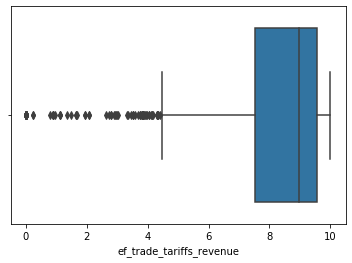

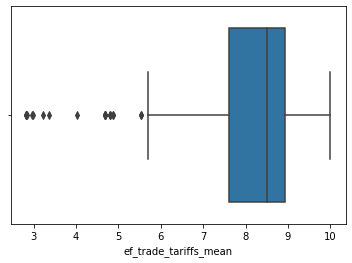

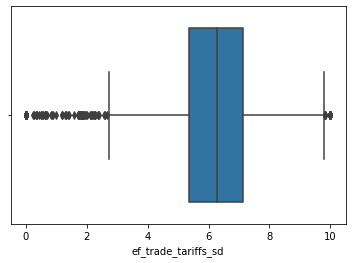

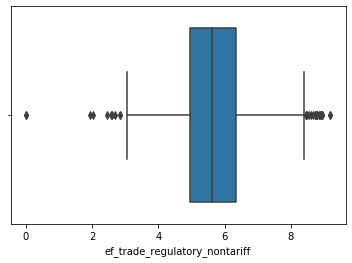

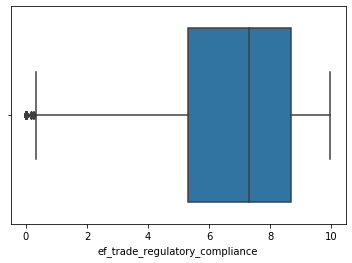

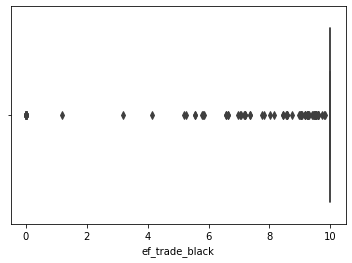

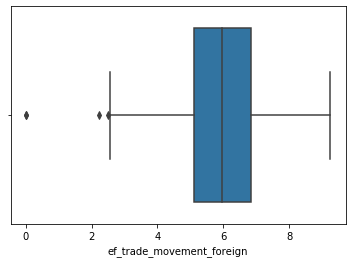

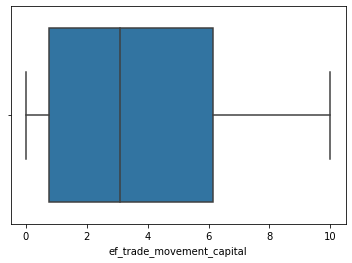

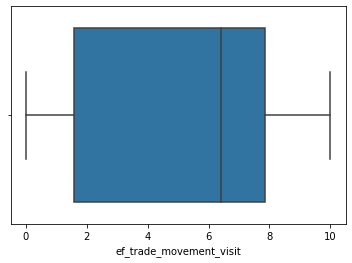

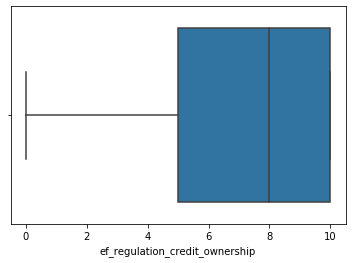

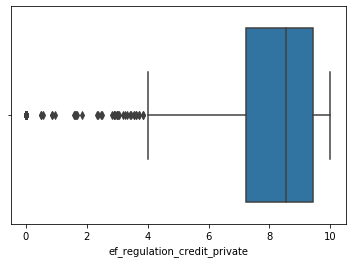

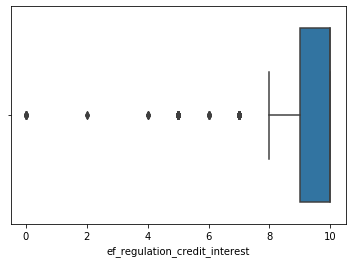

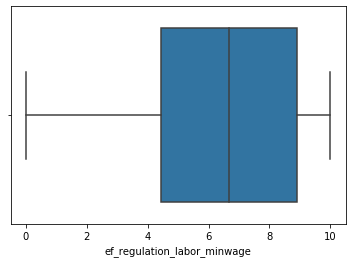

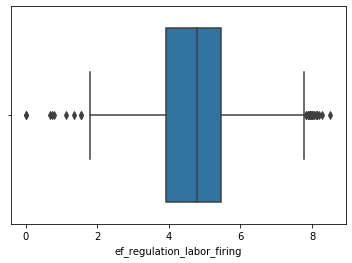

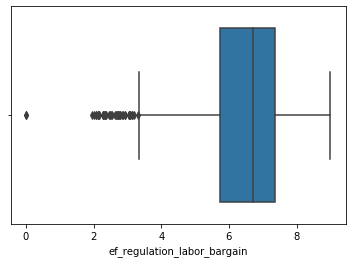

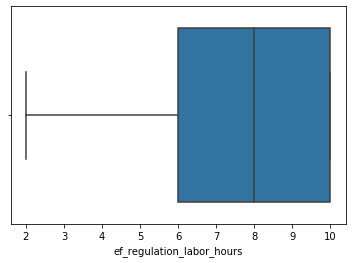

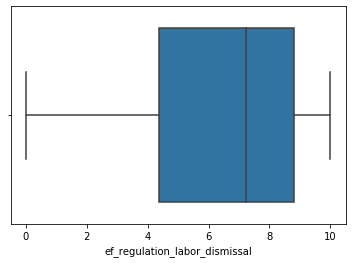

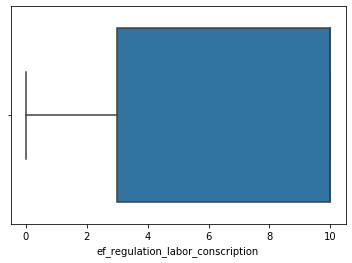

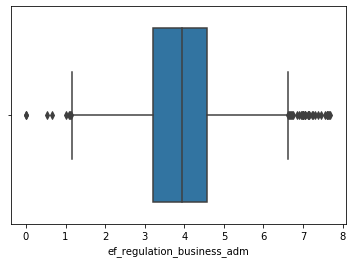

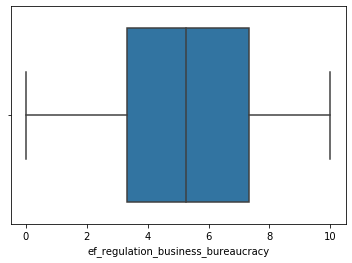

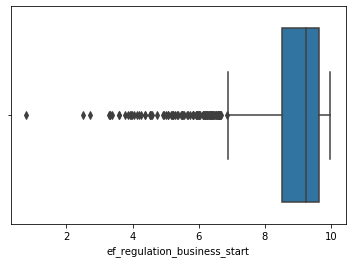

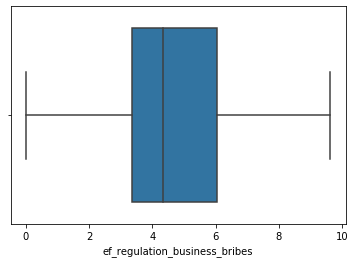

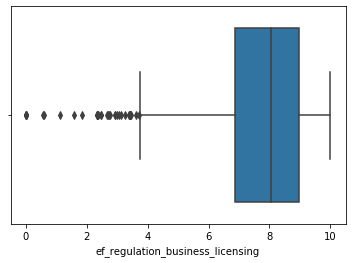

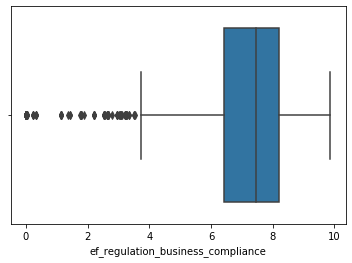

In [16]:
import seaborn as sb
import matplotlib.pyplot as plt

for i in inp_pt.columns:
    sb.boxplot(inp_pt[i])
    plt.show()

In [17]:
#Outlier Treatment
#Capping the outliers #Winsorization
for i in inp_pt.columns:
    q1=inp_pt[i].quantile(0.25)
    q3=inp_pt[i].quantile(0.75)
    iqr=q3-q1
    ub=q3 + 1.5*iqr
    lb=q1 - 1.5*iqr
    uc=inp_pt[i].quantile(0.99)
    lc=inp_pt[i].quantile(0.01)
    for ind1 in inp_pt[i].index:
        if inp_pt.loc[ind1, i] >ub:            
            inp_pt.loc[ind1, i] =uc
        if inp_pt.loc[ind1, i] < lb:
            inp_pt.loc[ind1, i] =lc

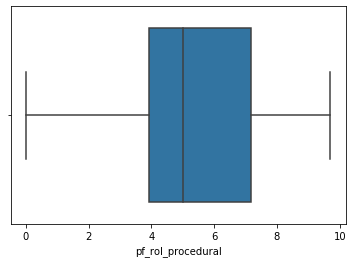

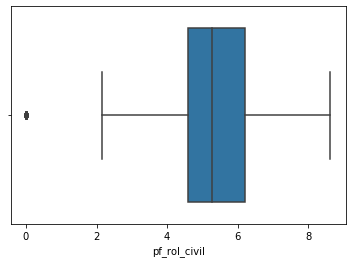

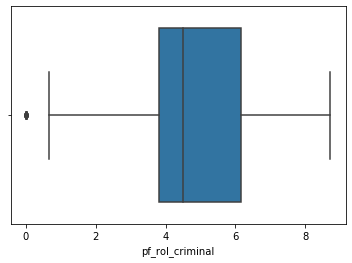

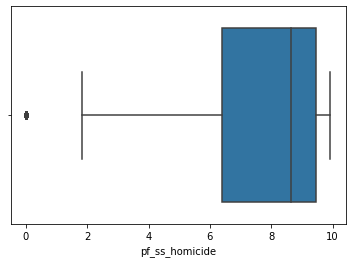

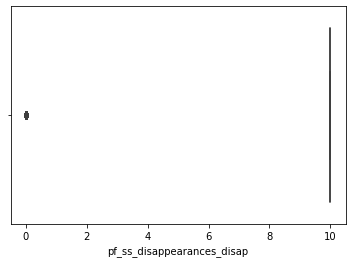

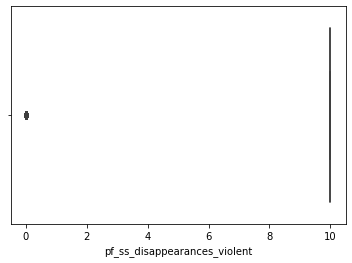

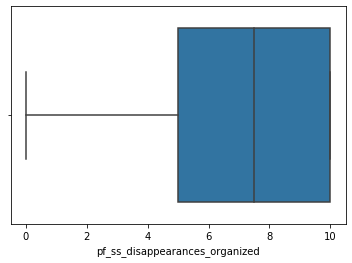

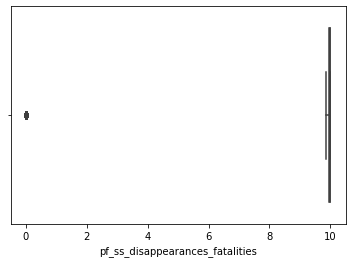

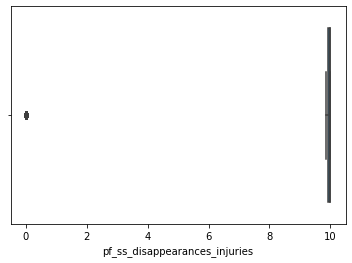

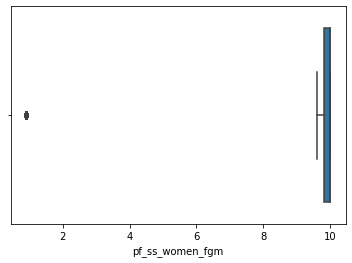

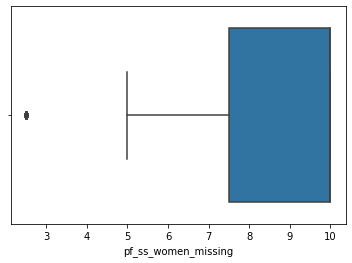

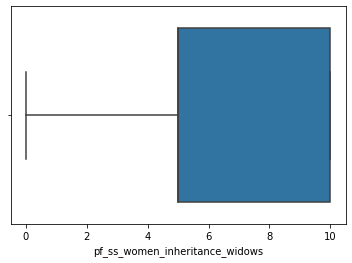

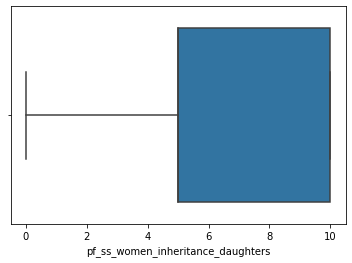

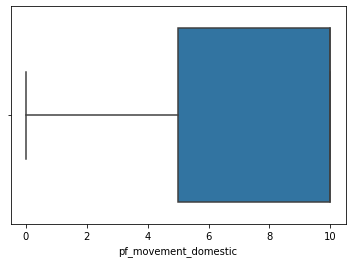

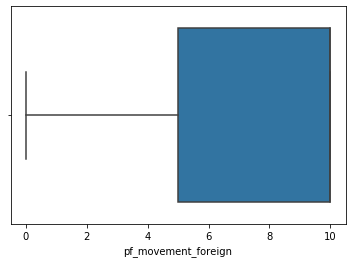

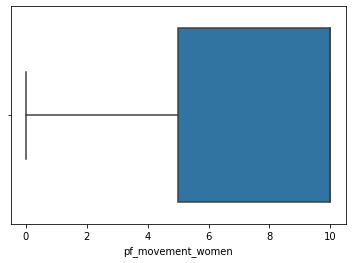

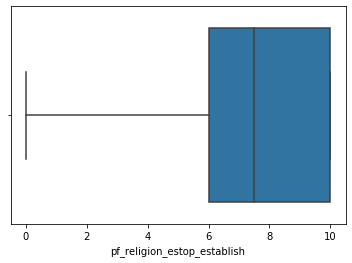

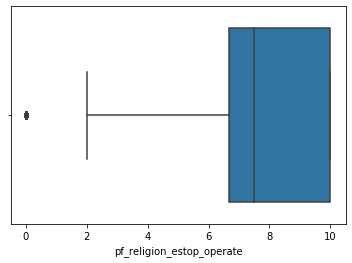

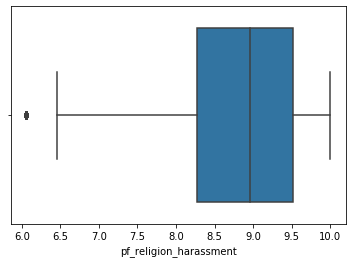

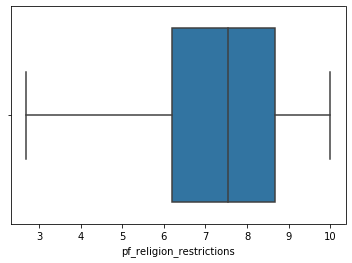

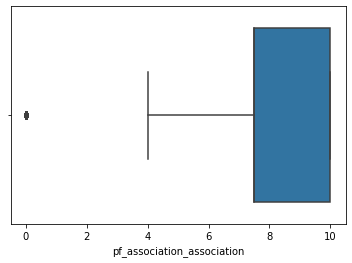

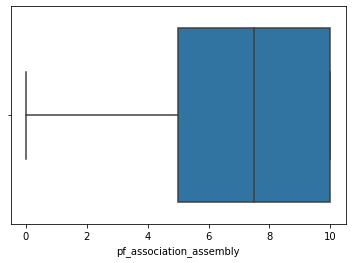

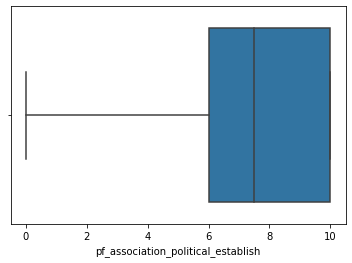

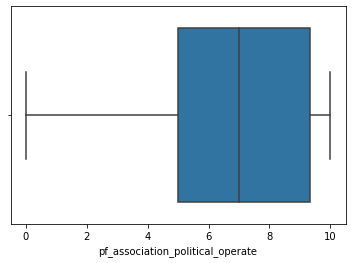

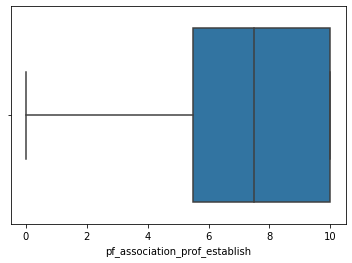

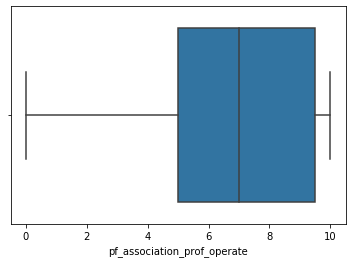

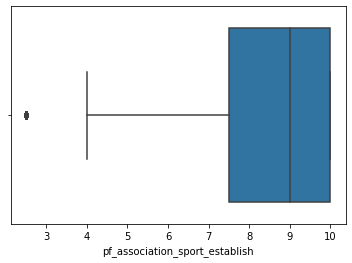

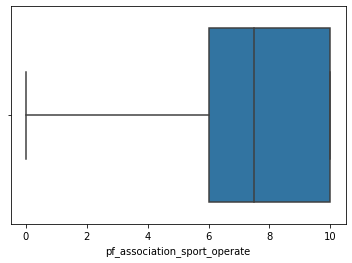

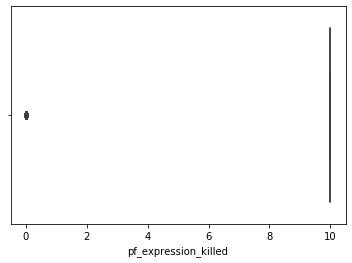

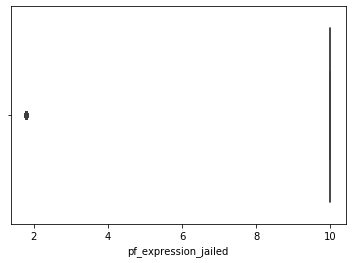

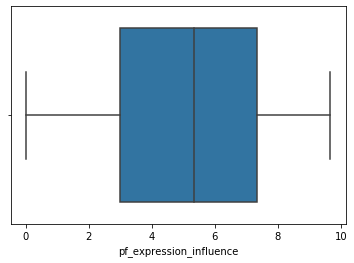

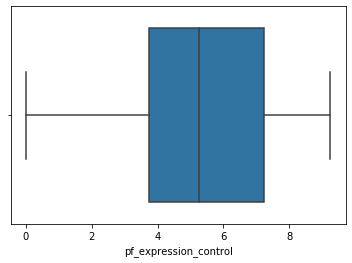

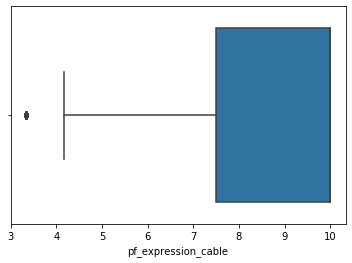

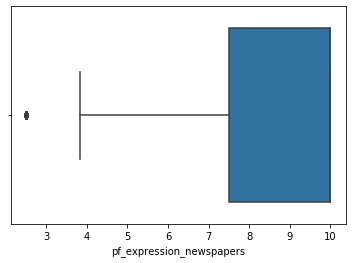

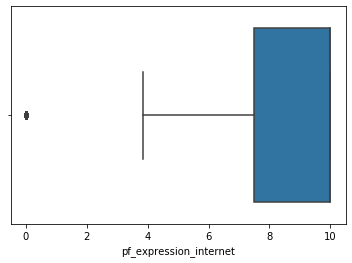

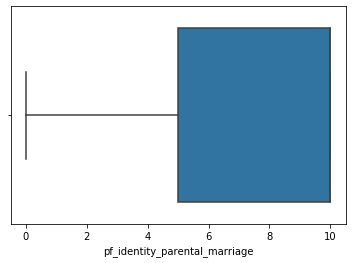

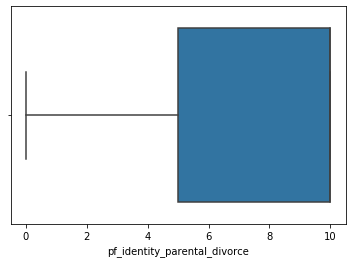

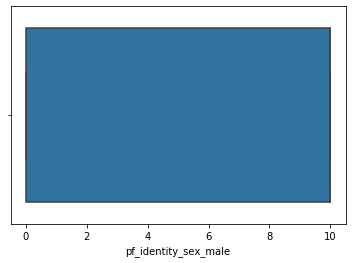

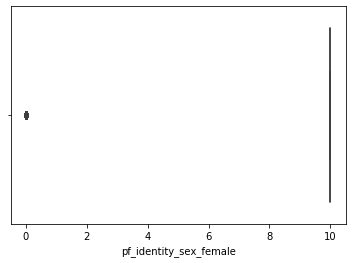

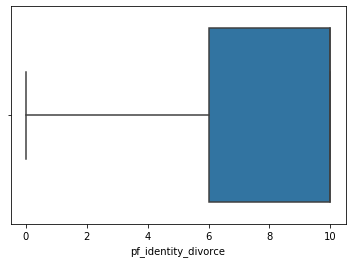

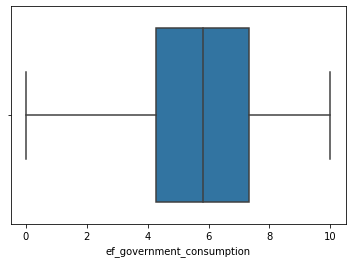

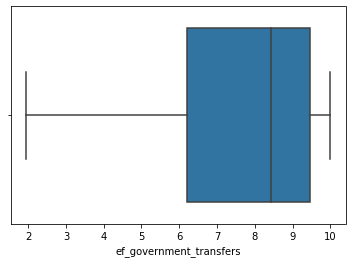

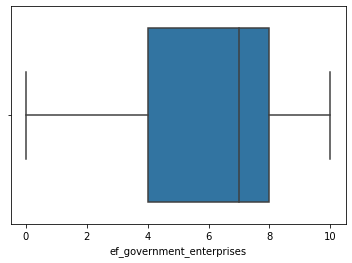

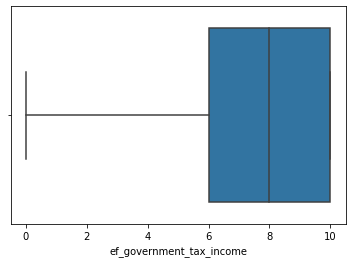

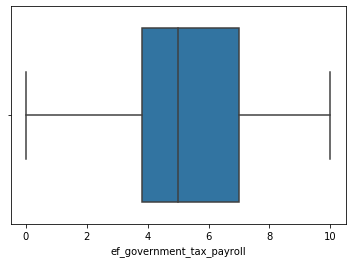

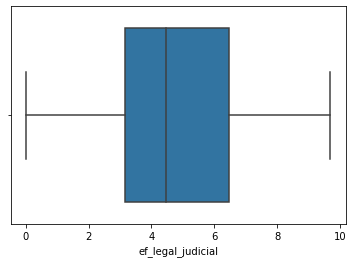

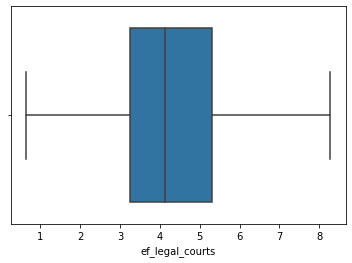

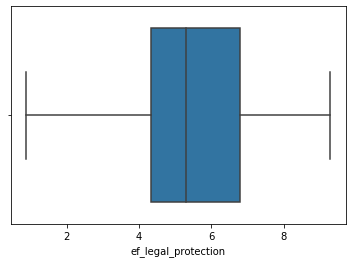

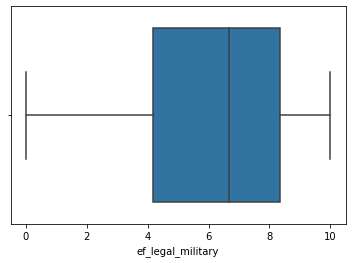

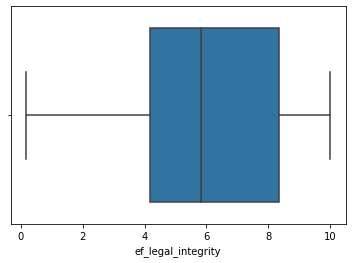

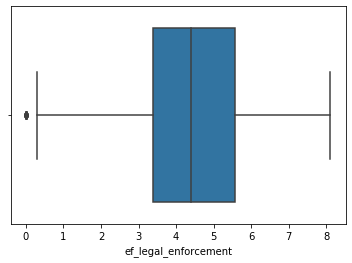

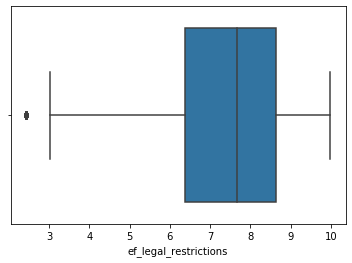

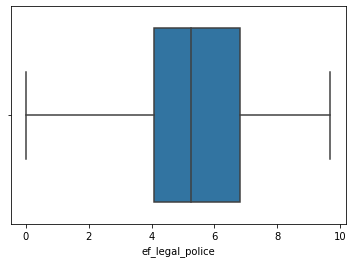

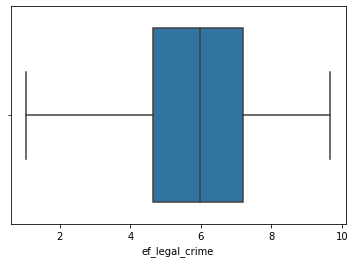

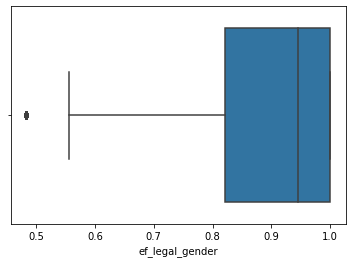

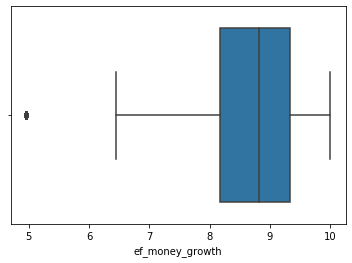

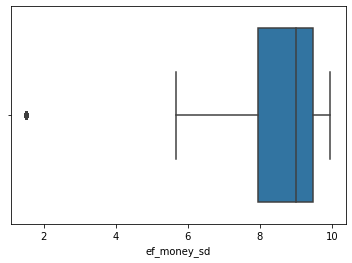

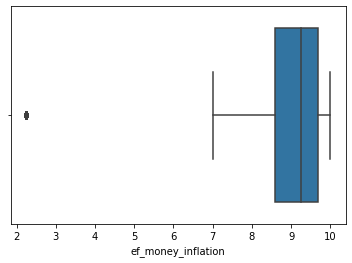

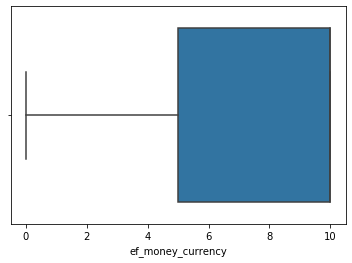

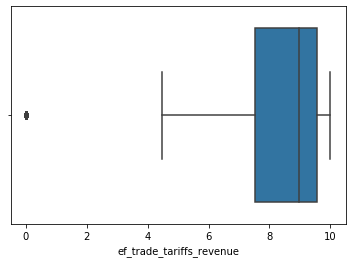

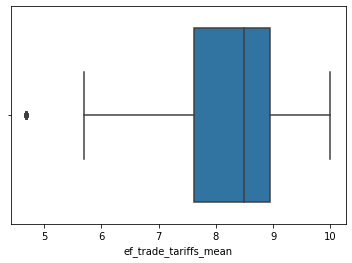

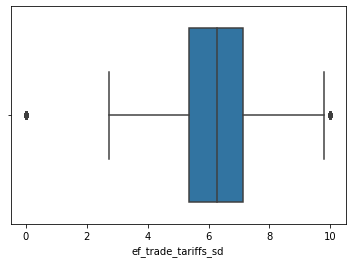

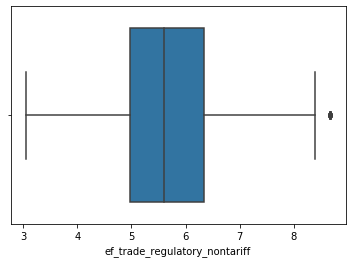

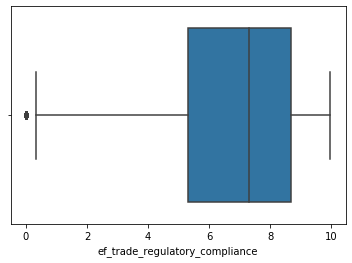

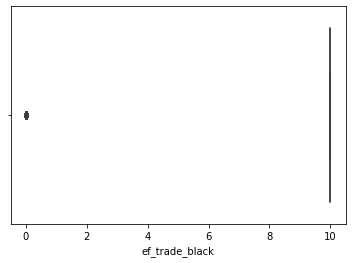

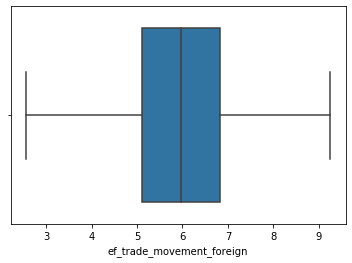

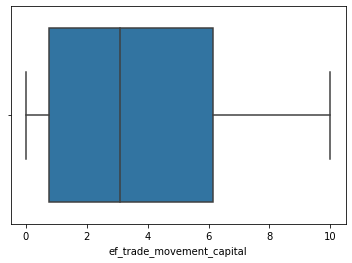

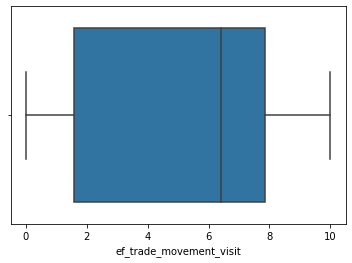

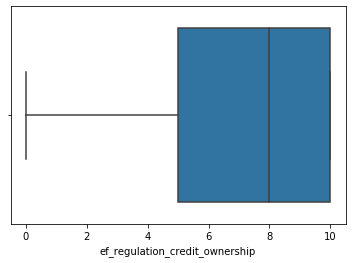

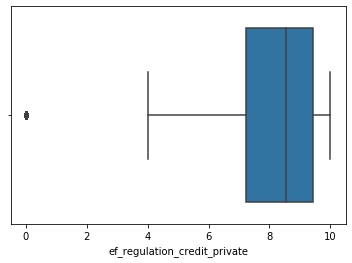

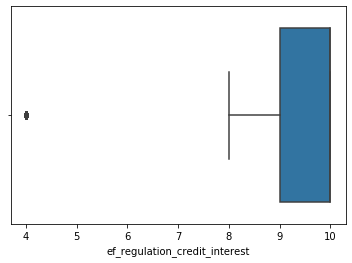

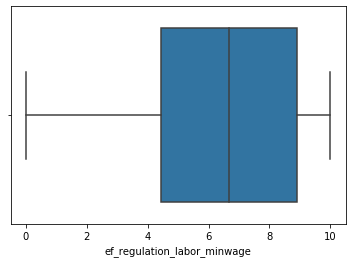

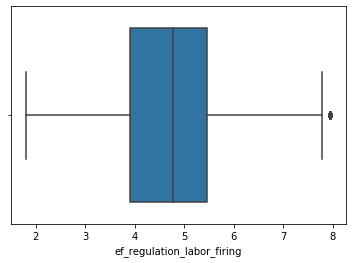

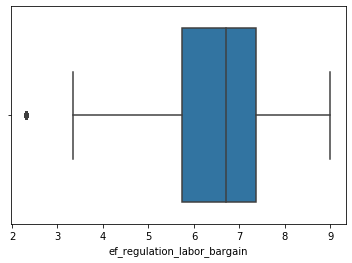

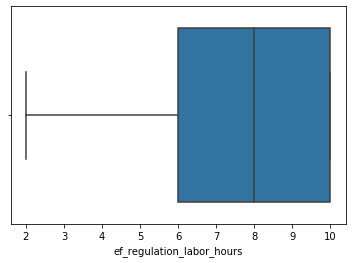

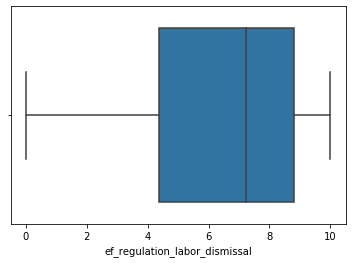

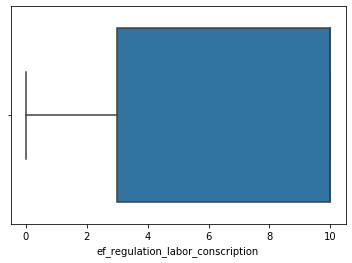

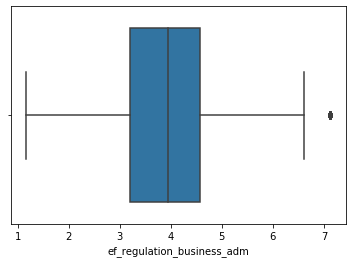

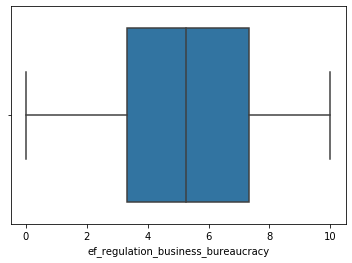

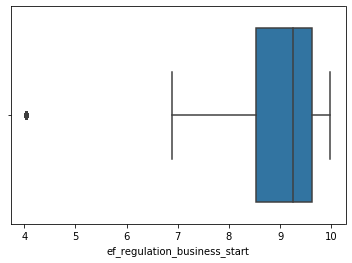

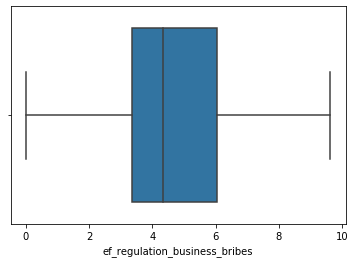

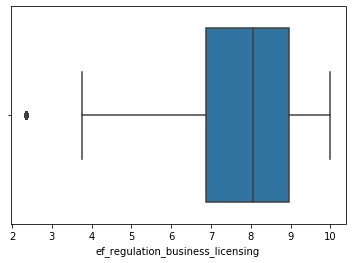

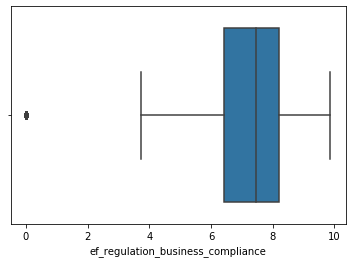

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

for i in inp_pt.columns:
    sb.boxplot(inp_pt[i])
    plt.show()

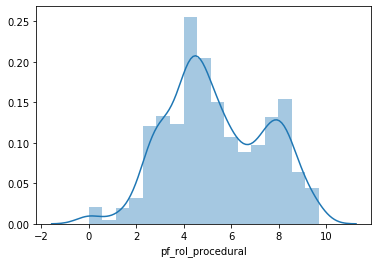

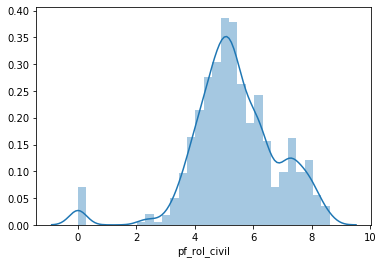

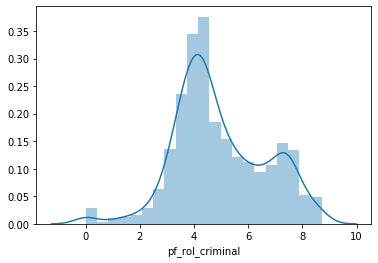

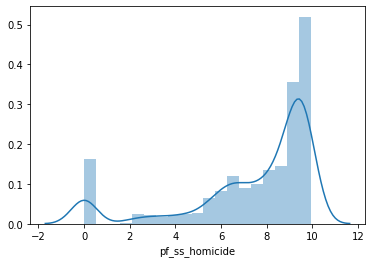

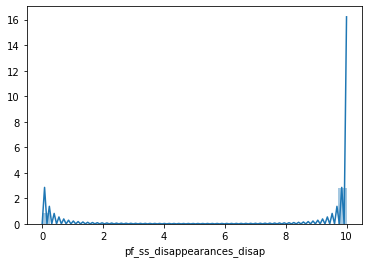

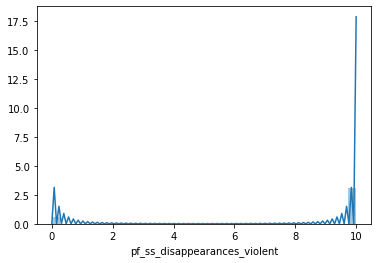

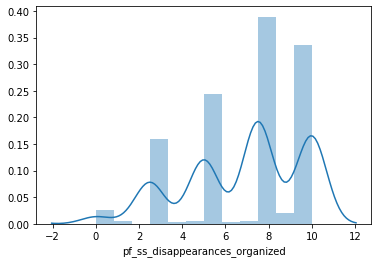

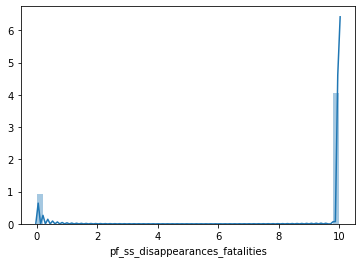

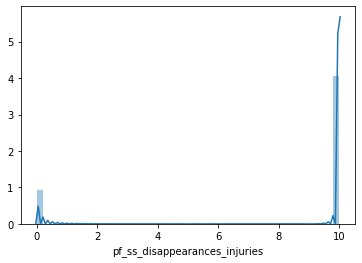

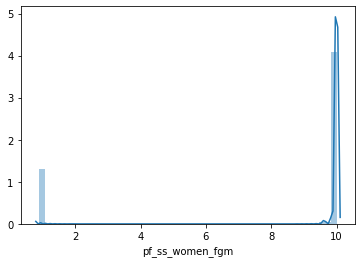

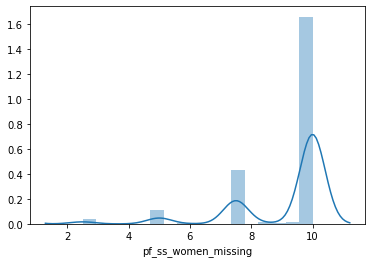

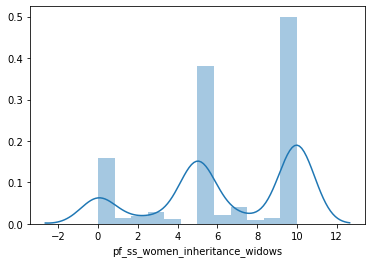

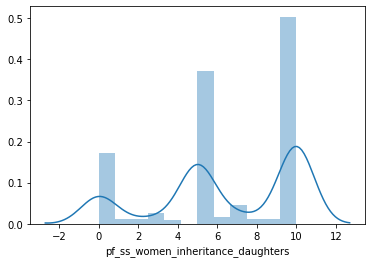

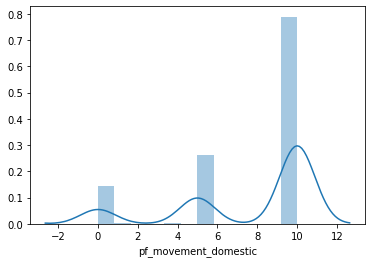

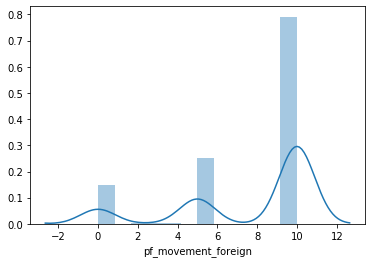

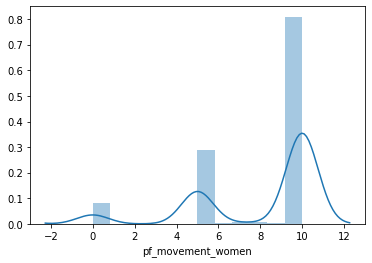

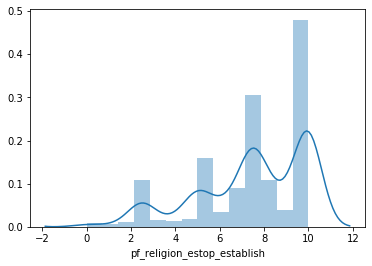

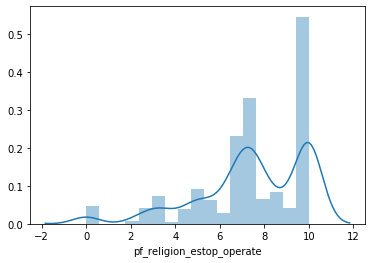

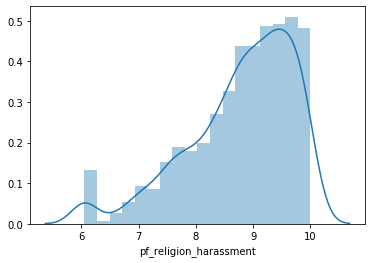

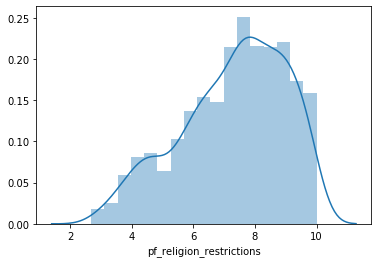

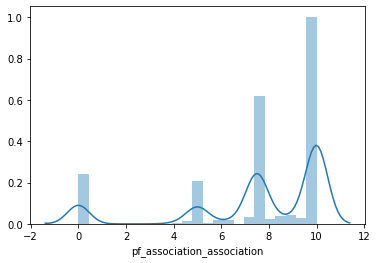

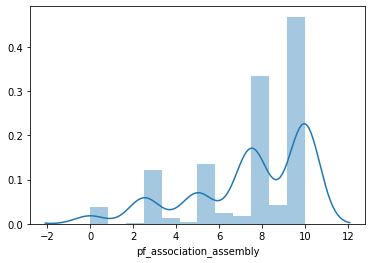

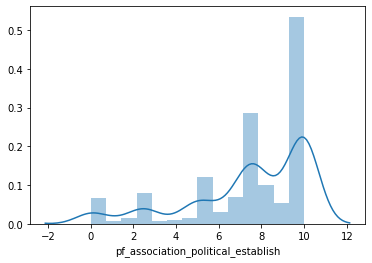

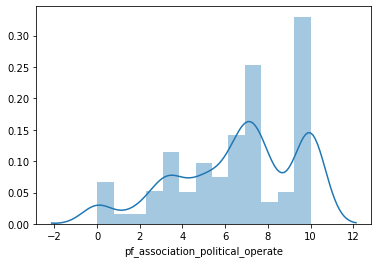

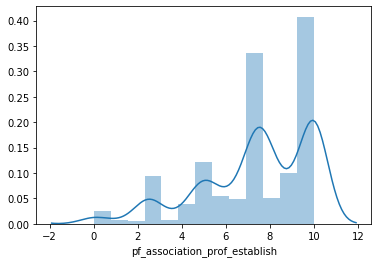

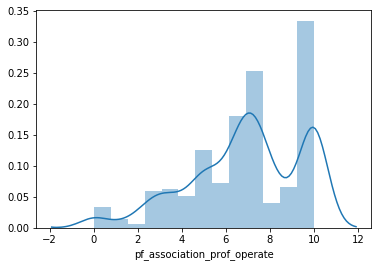

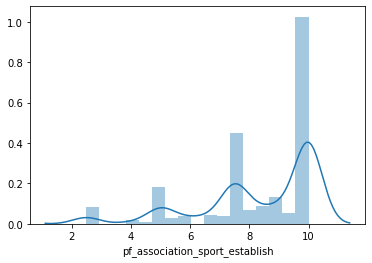

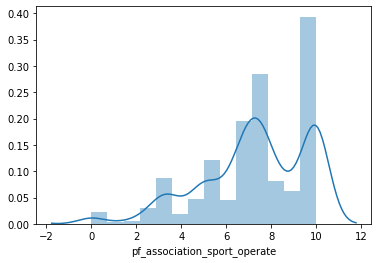

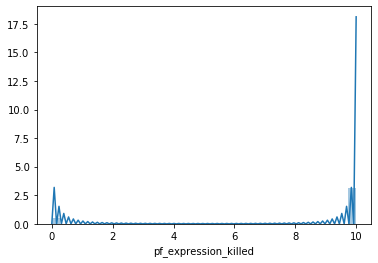

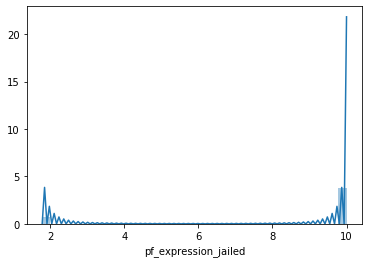

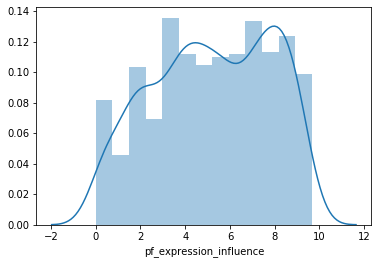

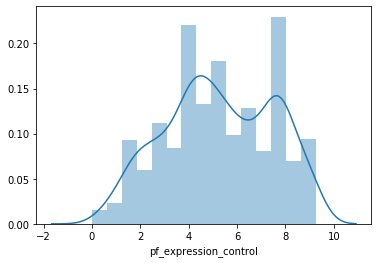

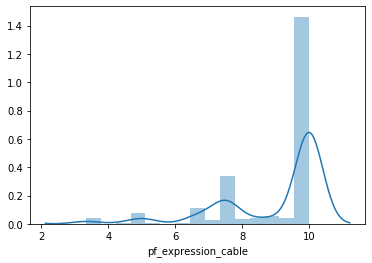

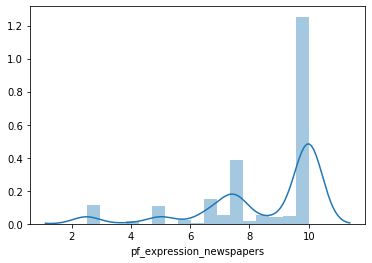

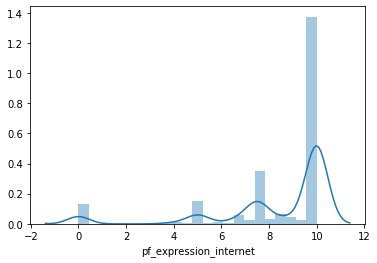

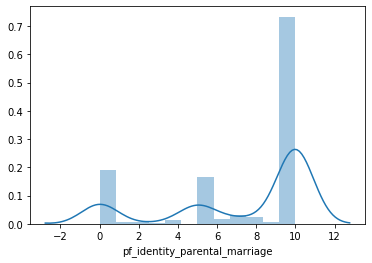

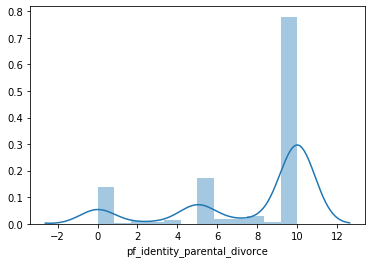

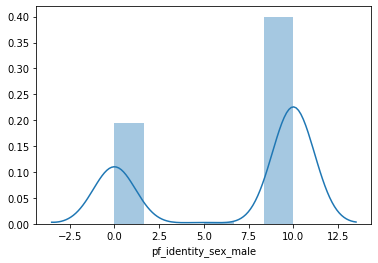

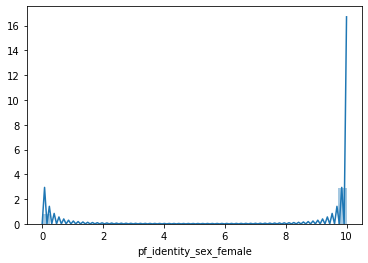

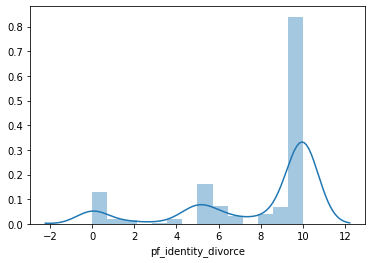

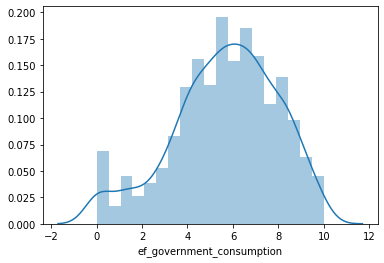

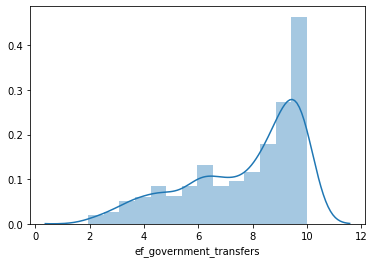

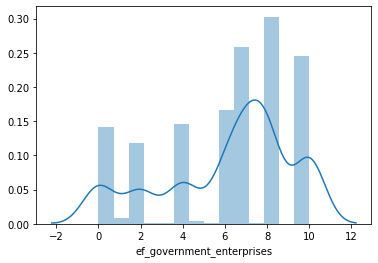

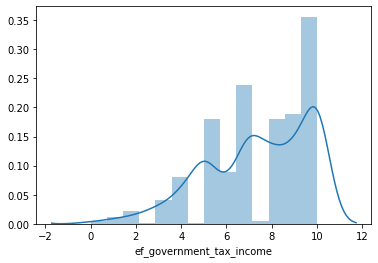

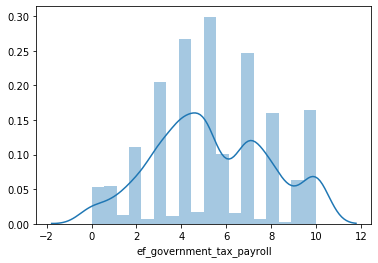

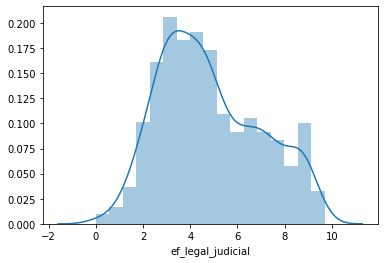

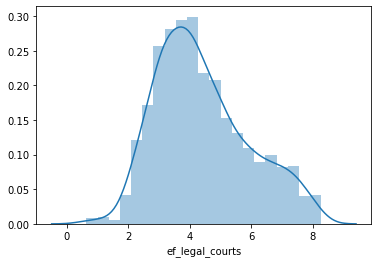

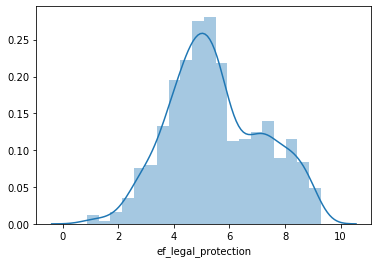

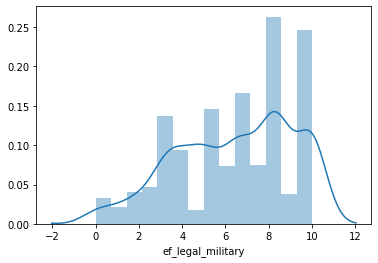

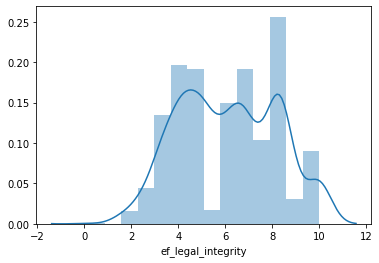

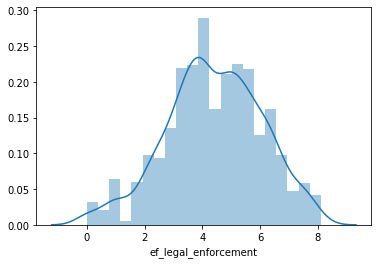

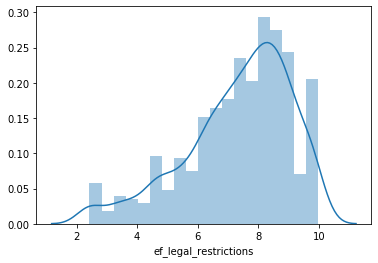

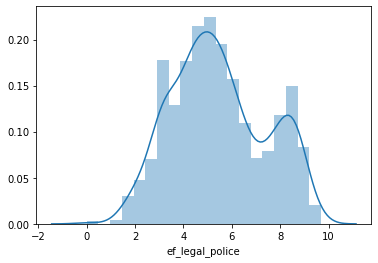

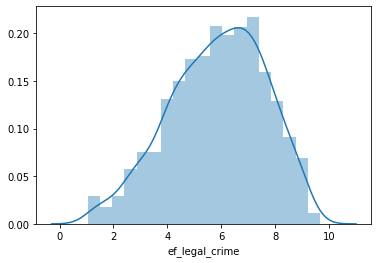

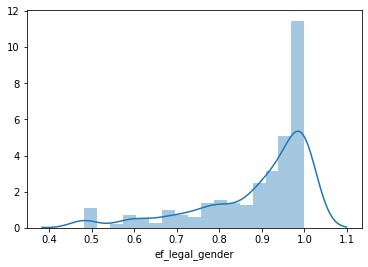

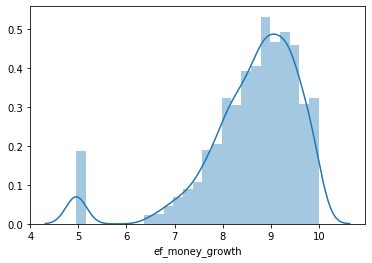

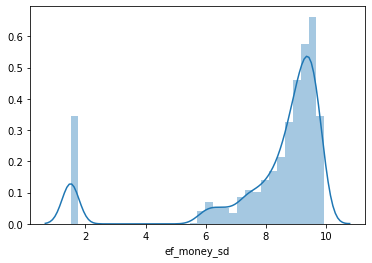

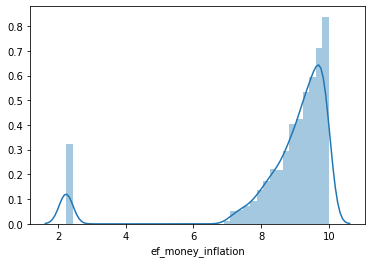

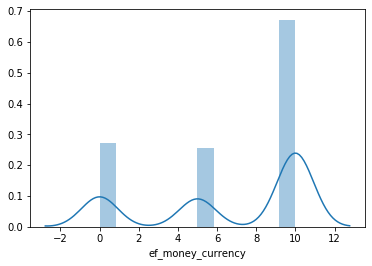

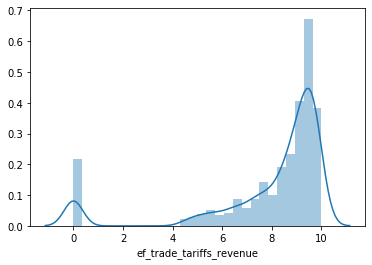

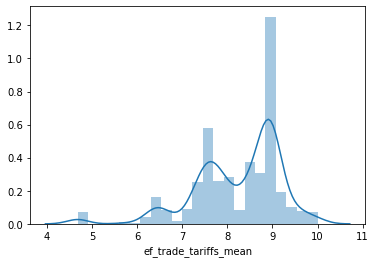

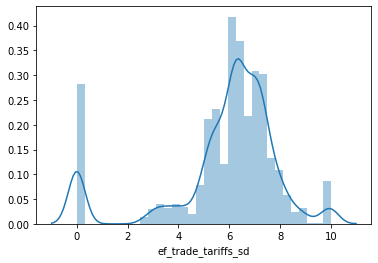

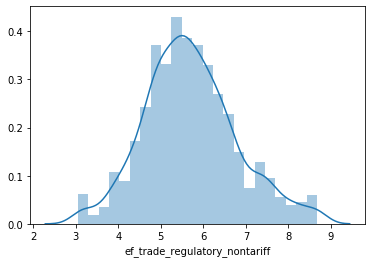

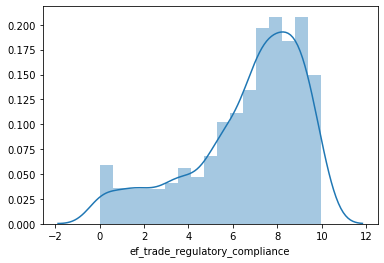

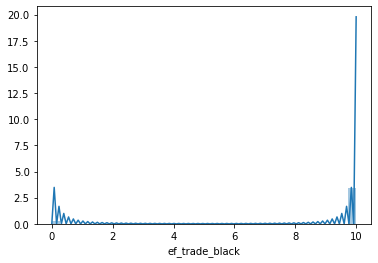

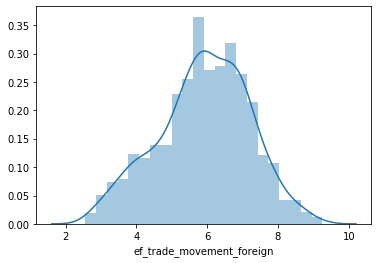

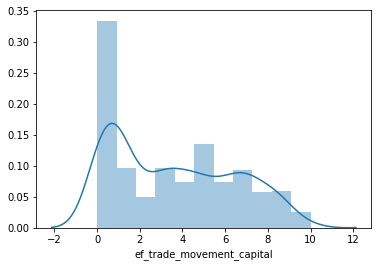

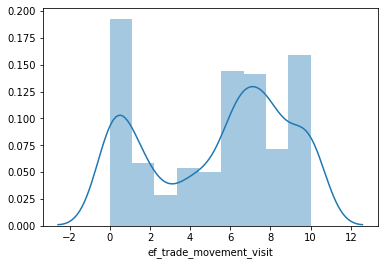

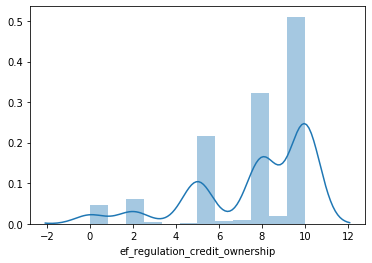

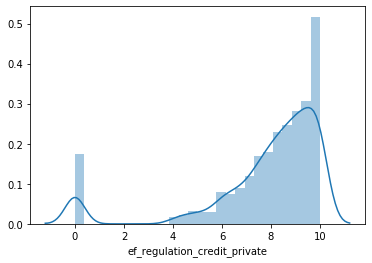

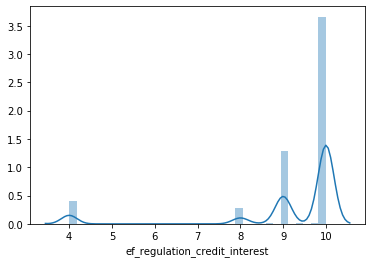

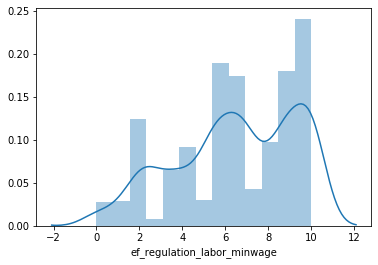

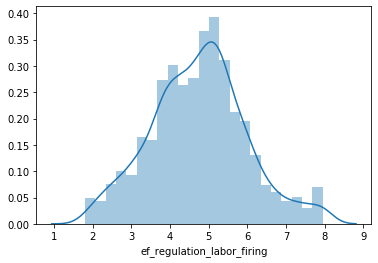

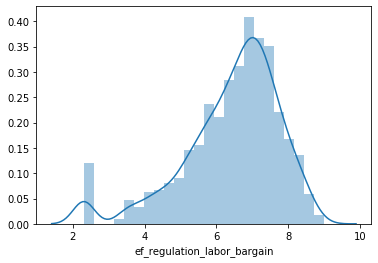

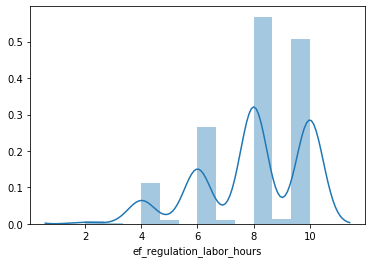

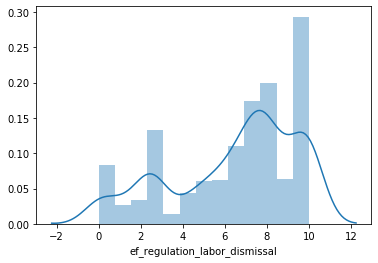

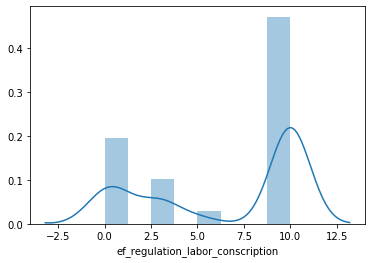

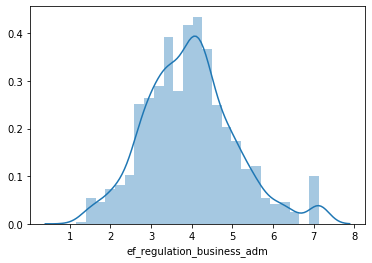

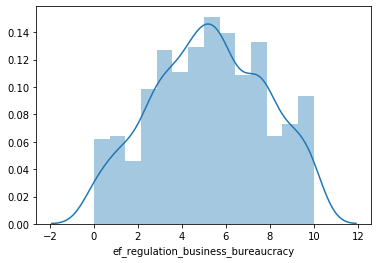

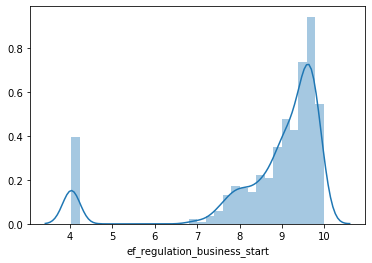

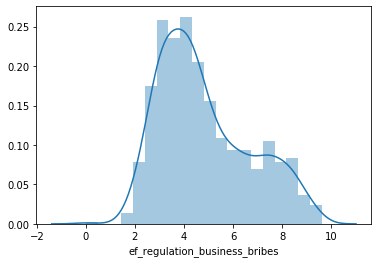

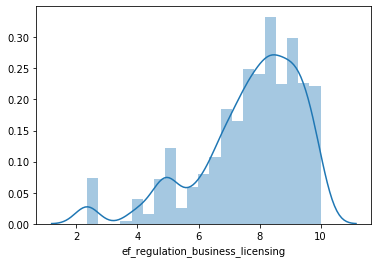

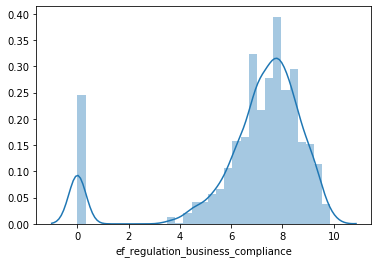

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt

for i in inp_pt.columns:
    sb.distplot(inp_pt[i])
    plt.show()

In [20]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
X1=inp_pt-inp_pt.mean()

In [22]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['feature']=X1.columns
vif.sort_values('VIF',ascending=False)

VIF                       feature
0   14.742968             pf_rol_procedural
2   13.660920               pf_rol_criminal
30  12.876327       pf_expression_influence
47  12.650106           ef_legal_protection
31  11.924744         pf_expression_control
..        ...                           ...
28   1.665612          pf_expression_killed
9    1.623847               pf_ss_women_fgm
55   1.530822               ef_money_growth
74   1.530005     ef_regulation_labor_hours
69   1.354091  ef_regulation_credit_private

[83 rows x 2 columns]

In [23]:
#treating VIF

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [24]:
vif_treated = calculate_vif(X1)

Iteration no.
1
[14.742967867452325, 7.719118057208162, 13.660919846728223, 3.872921935860127, 2.1241559845143803, 2.139978015072031, 3.264881124064919, 2.897595876139212, 2.5684495933293006, 1.6238467089002815, 1.8029070643209328, 9.816211151136754, 10.275115099847957, 2.110943555352716, 1.9698198455307359, 2.579393140969645, 4.164110017388835, 3.5056040869403917, 2.281152606999422, 2.298463397077021, 6.2430652965948985, 5.928516756980934, 5.034175575247564, 3.731129569928695, 3.6892477872810305, 4.378008530297462, 3.9278022081397417, 3.216590789056145, 1.6656119266435945, 1.839443962367437, 12.876327311918832, 11.924743869315988, 3.5080197996804174, 3.9457234897464635, 3.368229684827853, 6.172705561144669, 5.813548278210465, 4.434471445966582, 3.395271427485692, 4.8012346505115495, 2.626693527772553, 4.367365319381667, 2.1103686164697324, 3.590160380042235, 3.776280393582459, 11.84518345015631, 9.297690572176295, 12.650106309773339, 4.496758632624459, 5.384960804624069, 2.81232322082

Iteration no.
7
[3.311260215407572, 3.254135196744919, 2.0384561021458056, 2.0893576386055743, 3.2032393847251024, 2.8807022794817456, 2.5416573478333024, 1.6057082066680526, 1.7119315704970592, 4.020109086355956, 2.1036647060341047, 1.9483474738971935, 2.5582603223194686, 4.109403386888512, 3.415021506784169, 2.220603397996869, 2.2275846892764966, 6.083093610914779, 5.737944337625275, 4.8244597965248674, 3.5569056120307567, 3.63933876557988, 4.201634407782687, 3.8979633955449327, 3.1541729796846374, 1.6386938996935307, 1.7926737652893072, 4.971424700979055, 3.4633105225545204, 3.849879103604688, 3.174371622698543, 5.98985581107274, 5.744111756977335, 4.251777514340094, 3.2463565695116468, 4.647643271661014, 2.5824665976533283, 4.2167841017184395, 2.0375785075898074, 3.4852357575611665, 3.7083823992848015, 6.702783291878379, 4.339234078453334, 5.2342347472081325, 2.776588663548675, 2.3563319306176767, 7.85763438274048, 5.078392499781465, 3.5257552263908494, 1.494590279694338, 2.6217616

In [25]:
vif_treated.head()

pf_rol_civil  pf_ss_homicide  pf_ss_disappearances_disap  \
0     -0.829939        1.515514                    2.329463   
1     -0.147773        2.051338                    2.329463   
2     -1.445727        0.655345                   -7.670537   
3      0.414778        0.218059                    2.329463   
4      0.022533        1.403835                    2.329463   

   pf_ss_disappearances_violent  pf_ss_disappearances_organized  \
0                      1.538462                        3.170537   
1                     -8.461538                       -1.829463   
2                      1.538462                        0.670537   
3                      1.538462                        0.670537   
4                      1.538462                        0.670537   

   pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  \
0                         1.866588                       1.874901   
1                         1.792708                       1.865050   
2                         1.866588                       1.874901   
3                         1.866588                       1.865778   
4                        -8.133412                       1.806520   

   pf_ss_women_fgm  pf_ss_women_missing  pf_ss_women_inheritance_widows  ...  \
0         2.179173            -1.640058                       -1.429608  ...   
1         2.179173            -1.640058                       -6.429608  ...   
2         2.179173             0.859942                       -1.429608  ...   
3         2.179173             0.859942                        3.570392  ...   
4         2.179173            -4.140058                        3.570392  ...   

   ef_regulation_labor_firing  ef_regulation_labor_bargain  \
0                    0.653070                    -0.193778   
1                   -0.846418                    -0.470318   
2                   -2.087132                    -1.255652   
3                   -2.551431                    -2.996026   
4                    1.022981                     0.394437   

   ef_regulation_labor_hours  ef_regulation_labor_dismissal  \
0                   0.034833                      -0.145030   
1                  -1.965167                       1.310405   
2                  -3.965167                       0.187993   
3                   2.034833                      -3.927518   
4                   2.034833                       2.806954   

   ef_regulation_labor_conscription  ef_regulation_business_adm  \
0                          3.444702                    2.109586   
1                         -5.555298                   -0.240244   
2                         -6.555298                   -1.204157   
3                          3.444702                   -1.558374   
4                         -6.555298                    0.589879   

   ef_regulation_business_bureaucracy  ef_regulation_business_start  \
0                            0.747604                      0.983835   
1                           -3.474618                      0.513042   
2                           -3.919063                     -0.065401   
3                            1.414271                      0.392329   
4                            0.747604                      1.116443   

   ef_regulation_business_licensing  ef_regulation_business_compliance  
0                         -0.374137                           0.210389  
1                          0.824784                           0.165552  
2                          0.398057                          -0.081053  
3                         -2.445308                          -0.355682  
4                          1.620893                          -0.372496  

[5 rows x 72 columns]

In [26]:
vif_treated.columns

Index(['pf_rol_civil', 'pf_ss_homicide', 'pf_ss_disappearances_disap',
       'pf_ss_disappearances_violent', 'pf_ss_disappearances_organized',
       'pf_ss_disappearances_fatalities', 'pf_ss_disappearances_injuries',
       'pf_ss_women_fgm', 'pf_ss_women_missing',
       'pf_ss_women_inheritance_widows', 'pf_movement_domestic',
       'pf_movement_foreign', 'pf_movement_women',
       'pf_religion_estop_establish', 'pf_religion_estop_operate',
       'pf_religion_harassment', 'pf_religion_restrictions',
       'pf_association_assembly', 'pf_association_political_establish',
       'pf_association_political_operate', 'pf_association_prof_establish',
       'pf_association_prof_operate', 'pf_association_sport_establish',
       'pf_association_sport_operate', 'pf_expression_killed',
       'pf_expression_jailed', 'pf_expression_control', 'pf_expression_cable',
       'pf_expression_newspapers', 'pf_expression_internet',
       'pf_identity_parental_divorce', 'pf_identity_sex_male',
  

In [27]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(vif_treated.values,i) for i in range(vif_treated.shape[1])]
vif['feature']=vif_treated.columns
vif.sort_values('VIF',ascending=False)

VIF                             feature
40  4.949525                  ef_legal_integrity
26  4.890172               pf_expression_control
18  4.714106  pf_association_political_establish
17  4.601265             pf_association_assembly
39  4.236683                   ef_legal_military
..       ...                                 ...
24  1.632407                pf_expression_killed
7   1.543019                     pf_ss_women_fgm
45  1.483115                     ef_money_growth
64  1.465779           ef_regulation_labor_hours
59  1.331154        ef_regulation_credit_private

[72 rows x 2 columns]

In [28]:
import statsmodels.api as sm

inpc=sm.add_constant(vif_treated)
ols=sm.OLS(y,inpc)
ols_mod=ols.fit()
ols_mod.summary()

C:\Users\Harii\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     911.9
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:27   Log-Likelihood:                 723.35
No. Observations:                1378   AIC:                            -1301.
Df Residuals:                    1305   BIC:                            -919.0
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1764.845      0.000       6.986       7.001
pf_rol_civil                           0.0424      0.005      9.079      0.000       0.033       0.052
pf_ss_homicide                         0.0362      0.002     14.838      0.000       0.031       0.041
pf_ss_disappearances_disap             0.0036      0.001      2.735      0.006       0.001       0.006
pf_ss_disappearances_violent           0.0033      0.002      2.095      0.036       0.000       0.006
pf_ss_disappearances_organized         0.0231      0.003      9.163      0.000       0.018       0.028
pf_ss_disappearances_fatalities       -0.0025      0.002     -1.469      0.142      -0.006       0.001
pf_ss_disappearances_injuries          0.0002      0.002      0.119      0.906      -0.003       0.003
pf_ss_women_fgm                        0.0052      0.001      4.121      0.000       0.003       0.008
pf_ss_women_missing                    0.0228      0.003      7.142      0.000       0.017       0.029
pf_ss_women_inheritance_widows         0.0140      0.002      6.378      0.000       0.010       0.018
pf_movement_domestic                   0.0195      0.002     11.984      0.000       0.016       0.023
pf_movement_foreign                    0.0167      0.002     10.753      0.000       0.014       0.020
pf_movement_women                      0.0240      0.002     11.519      0.000       0.020       0.028
pf_religion_estop_establish            0.0125      0.003      3.904      0.000       0.006       0.019
pf_religion_estop_operate              0.0019      0.003      0.633      0.527      -0.004       0.008
pf_religion_harassment                 0.0051      0.006      0.815      0.415      -0.007       0.017
pf_religion_restrictions               0.0272      0.003      7.925      0.000       0.021       0.034
pf_association_assembly                0.0226      0.003      7.388      0.000       0.017       0.029
pf_association_political_establish    -0.0111      0.003     -3.656      0.000      -0.017      -0.005
pf_association_political_operate       0.0078      0.003      3.002      0.003       0.003       0.013
pf_association_prof_establish         -0.0012      0.003     -0.407      0.684      -0.007       0.005
pf_association_prof_operate            0.0149      0.003      4.731      0.000       0.009       0.021
pf_association_sport_establish        -0.0063      0.004     -1.646      0.100      -0.014       0.001
pf_association_sport_operate           0.0081      0.003      2.737      0.006       0.002       0.014
pf_expression_killed                   0.0047      0.001      3.255      0.001       0.002       0.008
pf_expression_jailed                   0.0044      0.002      2.461      0.014       0.001      

In [29]:
ols_mod.resid.skew()

-0.16010240462583372

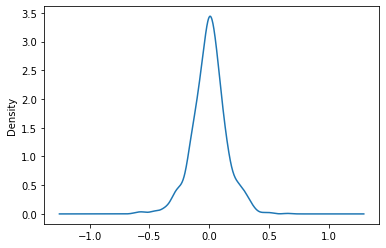

In [30]:
ols_mod.resid.plot(kind='kde')

In [31]:
import scipy.stats as stats

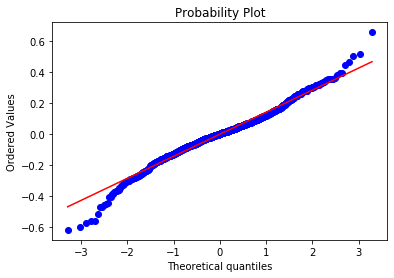

In [32]:
stats.probplot(ols_mod.resid,plot=plt)
plt.show()

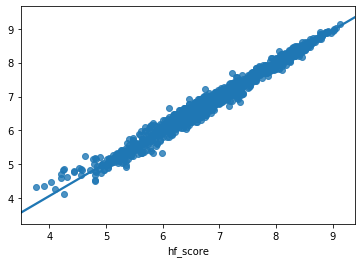

In [33]:
# Linearity Assumption
inpv3c=sm.add_constant(inpc)
ypred=ols_mod.predict(inpv3c)
sb.regplot(y,ypred)

In [34]:
from statsmodels.stats.diagnostic import linear_rainbow
#H0 : Part of the data is Linear

linear_rainbow(res=ols_mod)

(1.5006018251648032, 1.4077761615146312e-07)

In [35]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod.resid,vif_treated)

#H0 : Model is Homoscadastic 

(0.7871705147757694, 0.9984985330900027, 'increasing')

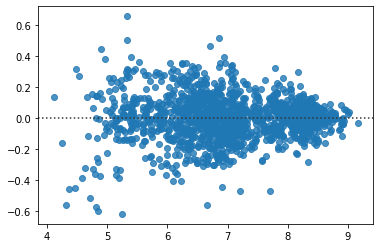

In [36]:
sb.residplot(ypred,ols_mod.resid)

In [37]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = ols_mod
fitted_vals = model.predict()

name = ['F statistic', 'p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

[('F statistic', 316.8978947521484), ('p-value', 1.887196258420431e-32)]

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(vif_treated,y,test_size=0.3,random_state=10)

xtrainc=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,xtrainc)
ols_mod=ols.fit()

ypred_train=ols_mod.predict(xtrainc)

xtestc=sm.add_constant(xtest)
ypred_test= ols_mod.predict(xtestc)

rmse_train= np.sqrt(np.mean((ytrain - ypred_train)**2))
rmse_test= np.sqrt(np.mean((ytest - ypred_test)**2))

In [39]:
rmse_test

0.16519195608357387

In [40]:
rmse_train

0.13557120867391362

In [41]:
rmse_train - rmse_test

-0.029620747409660253

In [42]:
dict1 = dict(ols_mod.pvalues)
sorted_values = sorted(dict1.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in dict1.keys():
        if dict1[k] == i:
            sorted_dict[k] = dict1[k]
            break

print(sorted_dict,'/n')

{'const': 0.0, 'pf_ss_homicide': 6.844431148134757e-35, 'pf_movement_domestic': 1.5329503128808546e-25, 'ef_money_currency': 1.1898245067574846e-24, 'pf_movement_women': 4.5806357052818334e-21, 'pf_identity_sex_male': 1.7693887955458025e-19, 'pf_movement_foreign': 2.8434832101395163e-19, 'pf_expression_control': 2.2020516383669595e-18, 'pf_ss_disappearances_organized': 5.435895313483067e-18, 'ef_trade_movement_foreign': 1.0553064047022201e-17, 'ef_government_tax_payroll': 2.1145477497172407e-15, 'ef_government_enterprises': 3.3491989625144258e-15, 'pf_association_assembly': 1.0020635867023985e-13, 'pf_rol_civil': 1.8396926656392497e-13, 'ef_money_sd': 1.2140728517612977e-12, 'ef_trade_regulatory_compliance': 1.4862951537267956e-11, 'pf_religion_restrictions': 2.7588897001183442e-11, 'ef_money_inflation': 6.035786226552236e-11, 'ef_regulation_credit_private': 2.0726136115844145e-10, 'pf_ss_women_inheritance_widows': 2.8418474221208674e-10, 'pf_ss_women_missing': 1.4665202649374865e-09, 

In [43]:
#1st iteration

first = vif_treated.drop('ef_regulation_labor_bargain',axis=1)

In [44]:
import statsmodels.api as sm

inpc1=sm.add_constant(first)
ols=sm.OLS(y,inpc1)
ols_mod1=ols.fit()
ols_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     925.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:30   Log-Likelihood:                 723.27
No. Observations:                1378   AIC:                            -1303.
Df Residuals:                    1306   BIC:                            -926.1
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1765.413      0.000       6.986       7.001
pf_rol_civil                           0.0425      0.005      9.132      0.000       0.033       0.052
pf_ss_homicide                         0.0361      0.002     14.893      0.000       0.031       0.041
pf_ss_disappearances_disap             0.0036      0.001      2.731      0.006       0.001       0.006
pf_ss_disappearances_violent           0.0033      0.002      2.100      0.036       0.000       0.006
pf_ss_disappearances_organized         0.0231      0.003      9.159      0.000       0.018       0.028
pf_ss_disappearances_fatalities       -0.0025      0.002     -1.470      0.142      -0.006       0.001
pf_ss_disappearances_injuries          0.0002      0.002      0.111      0.912      -0.003       0.003
pf_ss_women_fgm                        0.0052      0.001      4.103      0.000       0.003       0.008
pf_ss_women_missing                    0.0228      0.003      7.157      0.000       0.017       0.029
pf_ss_women_inheritance_widows         0.0141      0.002      6.388      0.000       0.010       0.018
pf_movement_domestic                   0.0195      0.002     12.002      0.000       0.016       0.023
pf_movement_foreign                    0.0168      0.002     10.761      0.000       0.014       0.020
pf_movement_women                      0.0240      0.002     11.526      0.000       0.020       0.028
pf_religion_estop_establish            0.0127      0.003      3.992      0.000       0.006       0.019
pf_religion_estop_operate              0.0019      0.003      0.646      0.519      -0.004       0.008
pf_religion_harassment                 0.0049      0.006      0.784      0.433      -0.007       0.017
pf_religion_restrictions               0.0273      0.003      7.932      0.000       0.021       0.034
pf_association_assembly                0.0226      0.003      7.383      0.000       0.017       0.029
pf_association_political_establish    -0.0110      0.003     -3.642      0.000      -0.017      -0.005
pf_association_political_operate       0.0077      0.003      2.982      0.003       0.003       0.013
pf_association_prof_establish         -0.0013      0.003     -0.437      0.662      -0.007       0.005
pf_association_prof_operate            0.0148      0.003      4.716      0.000       0.009       0.021
pf_association_sport_establish        -0.0063      0.004     -1.653      0.099      -0.014       0.001
pf_association_sport_operate           0.0082      0.003      2.779      0.006       0.002       0.014
pf_expression_killed                   0.0047      0.001      3.267      0.001       0.002       0.008
pf_expression_jailed                   0.0044      0.002      2.484      0.013       0.001      

In [45]:
ols_mod1.resid.skew() #normal

-0.16017413378780024

In [46]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res=ols_mod1, frac=0.5)

(1.5004167469486747, 1.4006618879052243e-07)

In [47]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod1.resid,first)

(0.7870520399151908, 0.9985192524893423, 'increasing')

In [48]:
# To understand the overffiting nature of model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(first,y,test_size=0.3,random_state=10)

xtrainc=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,xtrainc)
ols_mod1=ols.fit()

ypred_train=ols_mod1.predict(xtrainc)

xtestc=sm.add_constant(xtest)
ypred_test= ols_mod1.predict(xtestc)

rmse_train1= np.sqrt(np.mean((ytrain - ypred_train)**2))
rmse_test1= np.sqrt(np.mean((ytest - ypred_test)**2))

# deviation between rmse_train and rmse_test is more then my model is overfitted

In [49]:
rmse_train1

0.13557154314834607

In [50]:
rmse_test1

0.16517580193907275

In [51]:
rmse_train1 - rmse_test1

-0.029604258790726673

In [52]:
import statsmodels.api as sm

inpc2=sm.add_constant(first)
ols=sm.OLS(y,inpc2)
ols_mod2=ols.fit()
ols_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     925.4
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:31   Log-Likelihood:                 723.27
No. Observations:                1378   AIC:                            -1303.
Df Residuals:                    1306   BIC:                            -926.1
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1765.413      0.000       6.986       7.001
pf_rol_civil                           0.0425      0.005      9.132      0.000       0.033       0.052
pf_ss_homicide                         0.0361      0.002     14.893      0.000       0.031       0.041
pf_ss_disappearances_disap             0.0036      0.001      2.731      0.006       0.001       0.006
pf_ss_disappearances_violent           0.0033      0.002      2.100      0.036       0.000       0.006
pf_ss_disappearances_organized         0.0231      0.003      9.159      0.000       0.018       0.028
pf_ss_disappearances_fatalities       -0.0025      0.002     -1.470      0.142      -0.006       0.001
pf_ss_disappearances_injuries          0.0002      0.002      0.111      0.912      -0.003       0.003
pf_ss_women_fgm                        0.0052      0.001      4.103      0.000       0.003       0.008
pf_ss_women_missing                    0.0228      0.003      7.157      0.000       0.017       0.029
pf_ss_women_inheritance_widows         0.0141      0.002      6.388      0.000       0.010       0.018
pf_movement_domestic                   0.0195      0.002     12.002      0.000       0.016       0.023
pf_movement_foreign                    0.0168      0.002     10.761      0.000       0.014       0.020
pf_movement_women                      0.0240      0.002     11.526      0.000       0.020       0.028
pf_religion_estop_establish            0.0127      0.003      3.992      0.000       0.006       0.019
pf_religion_estop_operate              0.0019      0.003      0.646      0.519      -0.004       0.008
pf_religion_harassment                 0.0049      0.006      0.784      0.433      -0.007       0.017
pf_religion_restrictions               0.0273      0.003      7.932      0.000       0.021       0.034
pf_association_assembly                0.0226      0.003      7.383      0.000       0.017       0.029
pf_association_political_establish    -0.0110      0.003     -3.642      0.000      -0.017      -0.005
pf_association_political_operate       0.0077      0.003      2.982      0.003       0.003       0.013
pf_association_prof_establish         -0.0013      0.003     -0.437      0.662      -0.007       0.005
pf_association_prof_operate            0.0148      0.003      4.716      0.000       0.009       0.021
pf_association_sport_establish        -0.0063      0.004     -1.653      0.099      -0.014       0.001
pf_association_sport_operate           0.0082      0.003      2.779      0.006       0.002       0.014
pf_expression_killed                   0.0047      0.001      3.267      0.001       0.002       0.008
pf_expression_jailed                   0.0044      0.002      2.484      0.013       0.001      

In [53]:
dict1 = dict(ols_mod2.pvalues)
sorted_values = sorted(dict1.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in dict1.keys():
        if dict1[k] == i:
            sorted_dict[k] = dict1[k]
            break

print(sorted_dict,'/n')

{'const': 0.0, 'pf_ss_homicide': 1.8958516149837182e-46, 'ef_money_currency': 6.753747782051687e-34, 'pf_movement_domestic': 1.4856512783887728e-31, 'pf_expression_control': 3.108307847465704e-31, 'pf_movement_women': 2.4340718244646204e-29, 'pf_movement_foreign': 6.17378414983818e-26, 'pf_identity_sex_male': 9.528685039310448e-23, 'ef_government_enterprises': 8.108565196783468e-22, 'pf_ss_disappearances_organized': 1.963120245833227e-19, 'pf_rol_civil': 2.4852332570313882e-19, 'ef_government_tax_payroll': 3.8748064737302885e-19, 'ef_trade_movement_foreign': 4.6080087243521024e-18, 'ef_regulation_credit_private': 1.0918030335051667e-15, 'ef_money_sd': 2.849328598841598e-15, 'pf_religion_restrictions': 4.605239906751355e-15, 'ef_money_inflation': 1.3629704407536213e-14, 'ef_legal_crime': 3.2537846265707124e-14, 'ef_government_consumption': 1.161375516518626e-13, 'pf_association_assembly': 2.738601216323696e-13, 'ef_trade_regulatory_compliance': 3.386990000283306e-13, 'pf_ss_women_missin

In [54]:
#second

second = first.drop('pf_ss_disappearances_injuries',axis =1)

In [55]:
import statsmodels.api as sm

inpc2=sm.add_constant(second)
ols=sm.OLS(y,inpc2)
ols_mod2=ols.fit()
ols_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     939.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:31   Log-Likelihood:                 723.26
No. Observations:                1378   AIC:                            -1305.
Df Residuals:                    1307   BIC:                            -933.3
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1766.080      0.000       6.986       7.001
pf_rol_civil                           0.0425      0.005      9.136      0.000       0.033       0.052
pf_ss_homicide                         0.0361      0.002     14.900      0.000       0.031       0.041
pf_ss_disappearances_disap             0.0036      0.001      2.738      0.006       0.001       0.006
pf_ss_disappearances_violent           0.0033      0.002      2.136      0.033       0.000       0.006
pf_ss_disappearances_organized         0.0231      0.003      9.181      0.000       0.018       0.028
pf_ss_disappearances_fatalities       -0.0024      0.001     -1.704      0.089      -0.005       0.000
pf_ss_women_fgm                        0.0052      0.001      4.103      0.000       0.003       0.008
pf_ss_women_missing                    0.0228      0.003      7.161      0.000       0.017       0.029
pf_ss_women_inheritance_widows         0.0141      0.002      6.390      0.000       0.010       0.018
pf_movement_domestic                   0.0195      0.002     12.006      0.000       0.016       0.023
pf_movement_foreign                    0.0168      0.002     10.766      0.000       0.014       0.020
pf_movement_women                      0.0240      0.002     11.530      0.000       0.020       0.028
pf_religion_estop_establish            0.0127      0.003      3.997      0.000       0.006       0.019
pf_religion_estop_operate              0.0019      0.003      0.646      0.519      -0.004       0.008
pf_religion_harassment                 0.0049      0.006      0.786      0.432      -0.007       0.017
pf_religion_restrictions               0.0273      0.003      7.934      0.000       0.021       0.034
pf_association_assembly                0.0226      0.003      7.386      0.000       0.017       0.029
pf_association_political_establish    -0.0110      0.003     -3.645      0.000      -0.017      -0.005
pf_association_political_operate       0.0077      0.003      2.988      0.003       0.003       0.013
pf_association_prof_establish         -0.0013      0.003     -0.436      0.663      -0.007       0.005
pf_association_prof_operate            0.0148      0.003      4.718      0.000       0.009       0.021
pf_association_sport_establish        -0.0064      0.004     -1.657      0.098      -0.014       0.001
pf_association_sport_operate           0.0082      0.003      2.779      0.006       0.002       0.014
pf_expression_killed                   0.0047      0.001      3.275      0.001       0.002       0.008
pf_expression_jailed                   0.0044      0.002      2.485      0.013       0.001       0.008
pf_expression_control                  0.0469      0.004     11.942      0.000       0.039      

In [56]:
ols_mod2.resid.skew() #normal

-0.16038833051766702

In [57]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res=ols_mod2,frac=0.5)

(1.501632064401337, 1.3094633611388727e-07)

In [58]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod2.resid,second)

(0.787867182226619, 0.9984682114842208, 'increasing')

In [59]:
# To understand the overffiting nature of model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(second,y,test_size=0.3,random_state=10)

xtrainc=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,xtrainc)
ols_mod2=ols.fit()

ypred_train=ols_mod2.predict(xtrainc)

xtestc=sm.add_constant(xtest)
ypred_test= ols_mod2.predict(xtestc)

rmse_train2= np.sqrt(np.mean((ytrain - ypred_train)**2))
rmse_test2= np.sqrt(np.mean((ytest - ypred_test)**2))

# deviation between rmse_train and rmse_test is more then my model is overfitted

In [60]:
rmse_train2

0.135607534440669

In [61]:
rmse_test2

0.164997905675315

In [62]:
rmse_train2 - rmse_test2

-0.029390371234645996

In [63]:
import statsmodels.api as sm

inpc3=sm.add_constant(second)
ols=sm.OLS(y,inpc3)
ols_mod2=ols.fit()
ols_mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     939.3
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:32   Log-Likelihood:                 723.26
No. Observations:                1378   AIC:                            -1305.
Df Residuals:                    1307   BIC:                            -933.3
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1766.080      0.000       6.986       7.001
pf_rol_civil                           0.0425      0.005      9.136      0.000       0.033       0.052
pf_ss_homicide                         0.0361      0.002     14.900      0.000       0.031       0.041
pf_ss_disappearances_disap             0.0036      0.001      2.738      0.006       0.001       0.006
pf_ss_disappearances_violent           0.0033      0.002      2.136      0.033       0.000       0.006
pf_ss_disappearances_organized         0.0231      0.003      9.181      0.000       0.018       0.028
pf_ss_disappearances_fatalities       -0.0024      0.001     -1.704      0.089      -0.005       0.000
pf_ss_women_fgm                        0.0052      0.001      4.103      0.000       0.003       0.008
pf_ss_women_missing                    0.0228      0.003      7.161      0.000       0.017       0.029
pf_ss_women_inheritance_widows         0.0141      0.002      6.390      0.000       0.010       0.018
pf_movement_domestic                   0.0195      0.002     12.006      0.000       0.016       0.023
pf_movement_foreign                    0.0168      0.002     10.766      0.000       0.014       0.020
pf_movement_women                      0.0240      0.002     11.530      0.000       0.020       0.028
pf_religion_estop_establish            0.0127      0.003      3.997      0.000       0.006       0.019
pf_religion_estop_operate              0.0019      0.003      0.646      0.519      -0.004       0.008
pf_religion_harassment                 0.0049      0.006      0.786      0.432      -0.007       0.017
pf_religion_restrictions               0.0273      0.003      7.934      0.000       0.021       0.034
pf_association_assembly                0.0226      0.003      7.386      0.000       0.017       0.029
pf_association_political_establish    -0.0110      0.003     -3.645      0.000      -0.017      -0.005
pf_association_political_operate       0.0077      0.003      2.988      0.003       0.003       0.013
pf_association_prof_establish         -0.0013      0.003     -0.436      0.663      -0.007       0.005
pf_association_prof_operate            0.0148      0.003      4.718      0.000       0.009       0.021
pf_association_sport_establish        -0.0064      0.004     -1.657      0.098      -0.014       0.001
pf_association_sport_operate           0.0082      0.003      2.779      0.006       0.002       0.014
pf_expression_killed                   0.0047      0.001      3.275      0.001       0.002       0.008
pf_expression_jailed                   0.0044      0.002      2.485      0.013       0.001       0.008
pf_expression_control                  0.0469      0.004     11.942      0.000       0.039      

In [64]:
dict1 = dict(ols_mod2.pvalues)
sorted_values = sorted(dict1.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in dict1.keys():
        if dict1[k] == i:
            sorted_dict[k] = dict1[k]
            break

print(sorted_dict,'/n')

{'const': 0.0, 'pf_ss_homicide': 1.7180352227623158e-46, 'ef_money_currency': 6.420064881495571e-34, 'pf_movement_domestic': 1.4083259751900508e-31, 'pf_expression_control': 2.8427347285453065e-31, 'pf_movement_women': 2.3223624043234952e-29, 'pf_movement_foreign': 5.909584019952323e-26, 'pf_identity_sex_male': 9.093179585346291e-23, 'ef_government_enterprises': 7.403003645196735e-22, 'pf_ss_disappearances_organized': 1.627375907697554e-19, 'pf_rol_civil': 2.4022619949585414e-19, 'ef_government_tax_payroll': 3.7515160813873974e-19, 'ef_trade_movement_foreign': 4.3949003357477605e-18, 'ef_regulation_credit_private': 9.950384046561625e-16, 'ef_money_sd': 2.7943564967359923e-15, 'pf_religion_restrictions': 4.5240599064459004e-15, 'ef_money_inflation': 1.3395730350374643e-14, 'ef_legal_crime': 2.890742392457625e-14, 'ef_government_consumption': 1.1268302402716257e-13, 'pf_association_assembly': 2.695593207304012e-13, 'ef_trade_regulatory_compliance': 3.338075692047401e-13, 'pf_ss_women_mis

In [65]:
#third 

third = second.drop('ef_regulation_credit_interest',axis =1)

In [66]:
import statsmodels.api as sm

inpc3=sm.add_constant(third)
ols=sm.OLS(y,inpc3)
ols_mod3=ols.fit()
ols_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     953.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:33   Log-Likelihood:                 723.25
No. Observations:                1378   AIC:                            -1306.
Df Residuals:                    1308   BIC:                            -940.5
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1766.744      0.000       6.986       7.001
pf_rol_civil                           0.0425      0.005      9.139      0.000       0.033       0.052
pf_ss_homicide                         0.0361      0.002     14.934      0.000       0.031       0.041
pf_ss_disappearances_disap             0.0036      0.001      2.737      0.006       0.001       0.006
pf_ss_disappearances_violent           0.0033      0.002      2.144      0.032       0.000       0.006
pf_ss_disappearances_organized         0.0231      0.003      9.191      0.000       0.018       0.028
pf_ss_disappearances_fatalities       -0.0024      0.001     -1.702      0.089      -0.005       0.000
pf_ss_women_fgm                        0.0052      0.001      4.103      0.000       0.003       0.008
pf_ss_women_missing                    0.0228      0.003      7.163      0.000       0.017       0.029
pf_ss_women_inheritance_widows         0.0141      0.002      6.391      0.000       0.010       0.018
pf_movement_domestic                   0.0195      0.002     12.032      0.000       0.016       0.023
pf_movement_foreign                    0.0168      0.002     10.783      0.000       0.014       0.020
pf_movement_women                      0.0240      0.002     11.556      0.000       0.020       0.028
pf_religion_estop_establish            0.0127      0.003      4.021      0.000       0.007       0.019
pf_religion_estop_operate              0.0019      0.003      0.646      0.518      -0.004       0.008
pf_religion_harassment                 0.0049      0.006      0.789      0.430      -0.007       0.017
pf_religion_restrictions               0.0273      0.003      7.978      0.000       0.021       0.034
pf_association_assembly                0.0225      0.003      7.387      0.000       0.017       0.029
pf_association_political_establish    -0.0110      0.003     -3.672      0.000      -0.017      -0.005
pf_association_political_operate       0.0077      0.003      2.988      0.003       0.003       0.013
pf_association_prof_establish         -0.0013      0.003     -0.430      0.667      -0.007       0.005
pf_association_prof_operate            0.0148      0.003      4.718      0.000       0.009       0.021
pf_association_sport_establish        -0.0064      0.004     -1.669      0.095      -0.014       0.001
pf_association_sport_operate           0.0082      0.003      2.778      0.006       0.002       0.014
pf_expression_killed                   0.0047      0.001      3.274      0.001       0.002       0.008
pf_expression_jailed                   0.0044      0.002      2.486      0.013       0.001       0.008
pf_expression_control                  0.0469      0.004     11.946      0.000       0.039      

In [67]:
ols_mod3.resid.skew() #normal

-0.16050304690177242

In [68]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res=ols_mod3)

(1.494326730024525, 1.7875078612605028e-07)

In [69]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod3.resid,first)

(0.7870520399151962, 0.9985192524893418, 'increasing')

In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(third,y,test_size=0.3,random_state=10)

xtrainc=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,xtrainc)
ols_mod3=ols.fit()

ypred_train=ols_mod3.predict(xtrainc)

xtestc=sm.add_constant(xtest)
ypred_test= ols_mod3.predict(xtestc)

rmse_train3= np.sqrt(np.mean((ytrain - ypred_train)**2))
rmse_test3= np.sqrt(np.mean((ytest - ypred_test)**2))

# deviation between rmse_train and rmse_test is more then my model is overfitted

In [71]:
rmse_train3

0.135643866422868

In [72]:
rmse_test3

0.16489910261057455

In [73]:
rmse_train3 - rmse_test3

-0.029255236187706563

In [74]:
ols_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     720.8
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:34   Log-Likelihood:                 557.95
No. Observations:                 964   AIC:                            -975.9
Df Residuals:                     894   BIC:                            -634.9
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9953      0.005   1526.424      0.000       6.986       7.004
pf_rol_civil                           0.0414      0.005      7.534      0.000       0.031       0.052
pf_ss_homicide                         0.0361      0.003     13.017      0.000       0.031       0.042
pf_ss_disappearances_disap             0.0029      0.002      1.938      0.053    -3.7e-05       0.006
pf_ss_disappearances_violent           0.0035      0.002      1.944      0.052   -3.36e-05       0.007
pf_ss_disappearances_organized         0.0255      0.003      8.871      0.000       0.020       0.031
pf_ss_disappearances_fatalities       -0.0016      0.002     -0.994      0.321      -0.005       0.002
pf_ss_women_fgm                        0.0060      0.001      4.080      0.000       0.003       0.009
pf_ss_women_missing                    0.0220      0.004      6.119      0.000       0.015       0.029
pf_ss_women_inheritance_widows         0.0159      0.002      6.389      0.000       0.011       0.021
pf_movement_domestic                   0.0201      0.002     10.889      0.000       0.016       0.024
pf_movement_foreign                    0.0167      0.002      9.235      0.000       0.013       0.020
pf_movement_women                      0.0238      0.002      9.715      0.000       0.019       0.029
pf_religion_estop_establish            0.0131      0.004      3.513      0.000       0.006       0.020
pf_religion_estop_operate              0.0007      0.003      0.213      0.831      -0.006       0.008
pf_religion_harassment                 0.0138      0.007      1.836      0.067      -0.001       0.028
pf_religion_restrictions               0.0271      0.004      6.849      0.000       0.019       0.035
pf_association_assembly                0.0274      0.004      7.574      0.000       0.020       0.034
pf_association_political_establish    -0.0113      0.004     -3.222      0.001      -0.018      -0.004
pf_association_political_operate       0.0086      0.003      2.875      0.004       0.003       0.014
pf_association_prof_establish          0.0007      0.004      0.198      0.843      -0.006       0.008
pf_association_prof_operate            0.0159      0.004      4.269      0.000       0.009       0.023
pf_association_sport_establish        -0.0114      0.004     -2.534      0.011      -0.020      -0.003
pf_association_sport_operate           0.0094      0.003      2.731      0.006       0.003       0.016
pf_expression_killed                   0.0068      0.002      4.201      0.000       0.004       0.010
pf_expression_jailed                   0.0036      0.002      1.699      0.090      -0.001       0.008
pf_expression_control                  0.0421      0.005      8.920      0.000       0.033      

In [75]:
import statsmodels.api as sm

inpc4=sm.add_constant(third)
ols=sm.OLS(y,inpc4)
ols_mod4=ols.fit()
ols_mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     953.6
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:34   Log-Likelihood:                 723.25
No. Observations:                1378   AIC:                            -1306.
Df Residuals:                    1308   BIC:                            -940.5
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1766.744      0.000       6.986       7.001
pf_rol_civil                           0.0425      0.005      9.139      0.000       0.033       0.052
pf_ss_homicide                         0.0361      0.002     14.934      0.000       0.031       0.041
pf_ss_disappearances_disap             0.0036      0.001      2.737      0.006       0.001       0.006
pf_ss_disappearances_violent           0.0033      0.002      2.144      0.032       0.000       0.006
pf_ss_disappearances_organized         0.0231      0.003      9.191      0.000       0.018       0.028
pf_ss_disappearances_fatalities       -0.0024      0.001     -1.702      0.089      -0.005       0.000
pf_ss_women_fgm                        0.0052      0.001      4.103      0.000       0.003       0.008
pf_ss_women_missing                    0.0228      0.003      7.163      0.000       0.017       0.029
pf_ss_women_inheritance_widows         0.0141      0.002      6.391      0.000       0.010       0.018
pf_movement_domestic                   0.0195      0.002     12.032      0.000       0.016       0.023
pf_movement_foreign                    0.0168      0.002     10.783      0.000       0.014       0.020
pf_movement_women                      0.0240      0.002     11.556      0.000       0.020       0.028
pf_religion_estop_establish            0.0127      0.003      4.021      0.000       0.007       0.019
pf_religion_estop_operate              0.0019      0.003      0.646      0.518      -0.004       0.008
pf_religion_harassment                 0.0049      0.006      0.789      0.430      -0.007       0.017
pf_religion_restrictions               0.0273      0.003      7.978      0.000       0.021       0.034
pf_association_assembly                0.0225      0.003      7.387      0.000       0.017       0.029
pf_association_political_establish    -0.0110      0.003     -3.672      0.000      -0.017      -0.005
pf_association_political_operate       0.0077      0.003      2.988      0.003       0.003       0.013
pf_association_prof_establish         -0.0013      0.003     -0.430      0.667      -0.007       0.005
pf_association_prof_operate            0.0148      0.003      4.718      0.000       0.009       0.021
pf_association_sport_establish        -0.0064      0.004     -1.669      0.095      -0.014       0.001
pf_association_sport_operate           0.0082      0.003      2.778      0.006       0.002       0.014
pf_expression_killed                   0.0047      0.001      3.274      0.001       0.002       0.008
pf_expression_jailed                   0.0044      0.002      2.486      0.013       0.001       0.008
pf_expression_control                  0.0469      0.004     11.946      0.000       0.039      

In [76]:
dict1 = dict(ols_mod3.pvalues)
sorted_values = sorted(dict1.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in dict1.keys():
        if dict1[k] == i:
            sorted_dict[k] = dict1[k]
            break

print(sorted_dict,'/n')

{'const': 0.0, 'pf_ss_homicide': 1.3464143908961477e-35, 'pf_movement_domestic': 5.118213809988576e-26, 'ef_money_currency': 5.500536988688544e-25, 'pf_movement_women': 2.8198697334652194e-21, 'pf_identity_sex_male': 5.0123613639490363e-20, 'pf_movement_foreign': 1.827235668153386e-19, 'pf_expression_control': 2.585543100955224e-18, 'pf_ss_disappearances_organized': 3.873800376031443e-18, 'ef_trade_movement_foreign': 1.05204596032601e-17, 'ef_government_tax_payroll': 4.503535201360123e-16, 'ef_government_enterprises': 1.2369217035022049e-15, 'pf_association_assembly': 9.032220751586534e-14, 'pf_rol_civil': 1.2080072979350684e-13, 'ef_money_sd': 9.580720806092135e-13, 'ef_trade_regulatory_compliance': 1.2398544345747652e-11, 'pf_religion_restrictions': 1.3794454135125295e-11, 'ef_money_inflation': 5.4675782330374024e-11, 'ef_regulation_credit_private': 1.7496747420225682e-10, 'pf_ss_women_inheritance_widows': 2.680412211822961e-10, 'pf_ss_women_missing': 1.4091555184628716e-09, 'ef_lega

In [77]:
#final

final = third.drop(['pf_ss_disappearances_violent','pf_ss_disappearances_disap','ef_trade_tariffs_sd',
                   'pf_religion_harassment','ef_government_tax_income','pf_expression_jailed',
                   'ef_regulation_business_compliance','ef_regulation_business_licensing','pf_expression_internet',
                   'pf_ss_disappearances_fatalities','ef_trade_movement_capital','ef_trade_tariffs_mean',
                   'pf_identity_sex_female','pf_religion_estop_operate','pf_association_prof_establish',
                   'ef_regulation_business_adm'],axis =1)

In [78]:
import statsmodels.api as sm

inpc4=sm.add_constant(final)
ols=sm.OLS(y,inpc4)
ols_mod4=ols.fit()
ols_mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1206.
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        17:53:35   Log-Likelihood:                 695.70
No. Observations:                1378   AIC:                            -1283.
Df Residuals:                    1324   BIC:                            -1001.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.9934      0.004   1742.336      0.000       6.986       7.001
pf_rol_civil                           0.0447      0.004     10.045      0.000       0.036       0.053
pf_ss_homicide                         0.0367      0.002     15.560      0.000       0.032       0.041
pf_ss_disappearances_organized         0.0257      0.002     11.142      0.000       0.021       0.030
pf_ss_women_fgm                        0.0054      0.001      4.337      0.000       0.003       0.008
pf_ss_women_missing                    0.0239      0.003      7.640      0.000       0.018       0.030
pf_ss_women_inheritance_widows         0.0155      0.002      7.201      0.000       0.011       0.020
pf_movement_domestic                   0.0201      0.002     12.519      0.000       0.017       0.023
pf_movement_foreign                    0.0174      0.002     11.123      0.000       0.014       0.020
pf_movement_women                      0.0229      0.002     11.199      0.000       0.019       0.027
pf_religion_estop_establish            0.0122      0.003      4.068      0.000       0.006       0.018
pf_religion_restrictions               0.0295      0.003     11.019      0.000       0.024       0.035
pf_association_assembly                0.0221      0.003      7.464      0.000       0.016       0.028
pf_association_political_establish    -0.0108      0.003     -3.784      0.000      -0.016      -0.005
pf_association_political_operate       0.0081      0.003      3.156      0.002       0.003       0.013
pf_association_prof_operate            0.0157      0.003      5.571      0.000       0.010       0.021
pf_association_sport_establish        -0.0066      0.004     -1.799      0.072      -0.014       0.001
pf_association_sport_operate           0.0085      0.003      2.946      0.003       0.003       0.014
pf_expression_killed                   0.0064      0.001      4.597      0.000       0.004       0.009
pf_expression_control                  0.0496      0.004     12.902      0.000       0.042       0.057
pf_expression_cable                    0.0187      0.004      4.470      0.000       0.011       0.027
pf_expression_newspapers               0.0048      0.004      1.317      0.188      -0.002       0.012
pf_identity_parental_divorce           0.0061      0.002      2.910      0.004       0.002       0.010
pf_identity_sex_male                   0.0189      0.001     13.743      0.000       0.016       0.022
pf_identity_divorce                    0.0154      0.002      6.427      0.000       0.011       0.020
ef_government_consumption              0.0174      0.003      6.517      0.000       0.012       0.023
ef_government_transfers                0.0262      0.004      7.436      0.000       0.019      

In [79]:
pf_rol_civil, pf_ss_homicide, pf_ss_disappearances_organized, pf_ss_women_fgm, pf_ss_women_missing, pf_ss_women_inheritance_widows, pf_movement_domestic, pf_movement_foreign, pf_movement_women, pf_religion_estop_establish, pf_religion_restrictions, pf_association_assembly, pf_association_political_establish, pf_association_political_operate, pf_association_prof_operate, pf_association_sport_establish, pf_association_sport_operate, pf_expression_killed, pf_expression_control, pf_expression_cable, pf_expression_newspapers, pf_identity_parental_divorce, pf_identity_sex_male, pf_identity_divorce, ef_government_consumption, ef_government_transfers, ef_government_enterprises, ef_government_tax_payroll, ef_legal_military, ef_legal_integrity

NameError: name 'pf_rol_civil' is not defined

In [ ]:
ols_mod4.resid.skew() #normal

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res=ols_mod4)

In [ ]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_mod4.resid,final)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(final,y,test_size=0.3,random_state=10)

xtrainc=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,xtrainc)
ols_mod4=ols.fit()

ypred_train=ols_mod4.predict(xtrainc)

xtestc=sm.add_constant(xtest)
ypred_test= ols_mod4.predict(xtestc)

rmse_train4= np.sqrt(np.mean((ytrain - ypred_train)**2))
rmse_test4= np.sqrt(np.mean((ytest - ypred_test)**2))

# deviation between rmse_train and rmse_test is more then my model is overfitted

In [ ]:
rmse_train4

In [ ]:
rmse_test4

In [ ]:
rmse_train4 - rmse_test4

In [ ]:
top30 = final.drop(['ef_legal_enforcement','ef_legal_restrictions','ef_legal_crime','ef_legal_gender','ef_money_growth',
'ef_money_sd','ef_money_inflation','ef_money_currency','ef_trade_tariffs_revenue','ef_trade_regulatory_nontariff',
'ef_trade_regulatory_compliance','ef_trade_black','ef_trade_movement_foreign','ef_trade_movement_visit',
'ef_regulation_credit_ownership','ef_regulation_credit_private','ef_regulation_labor_minwage','ef_regulation_labor_firing',
'ef_regulation_labor_hours','ef_regulation_labor_dismissal','ef_regulation_labor_conscription',
'ef_regulation_business_bureaucracy','ef_regulation_business_start'], axis =1)

In [ ]:
import statsmodels.api as sm

inpc30=sm.add_constant(top30)
ols=sm.OLS(y,inpc30)
ols_top30=ols.fit()
ols_mod4.summary()

In [ ]:
ols_top30.resid.skew()

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

linear_rainbow(res=ols_top30)

In [ ]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(ols_top30.resid,first)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(top30,y,test_size=0.3,random_state=10)

xtrainc=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,xtrainc)
ols_top30=ols.fit()

ypred_train=ols_top30.predict(xtrainc)

xtestc=sm.add_constant(xtest)
ypred_test= ols_top30.predict(xtestc)

rmse_train30= np.sqrt(np.mean((ytrain - ypred_train)**2))
rmse_test30= np.sqrt(np.mean((ytest - ypred_test)**2))

# deviation between rmse_train and rmse_test is more then my model is overfitted

In [ ]:
ols_mod.summary()

In [ ]:
ols_top30.params

In [ ]:
rmse_train30

In [ ]:
rmse_test30

In [ ]:
rmse_train30 - rmse_test30

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
r2_score(ytest,ypred_test)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(vif_treated,y,test_size=0.3,random_state=10)

In [ ]:
import statsmodels.api as sm

poisson_training_results = sm.GLM(ytrain, xtrain, family=sm.families.Poisson()).fit()
print(poisson_training_results.summary())

In [ ]:
poisson_training_results.predict

In [ ]:
ypred_trainglm=poisson_training_results.predict(xtrain)
ypred_testglm= poisson_training_results.predict(xtest)

rmse_trainglm= np.sqrt(np.mean((ytrain - ypred_trainglm)**2))
rmse_testglm= np.sqrt(np.mean((ytest - ypred_testglm)**2))

In [ ]:
rmse_trainglm - rmse_testglm

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
lr=LinearRegression()
score=cross_val_score(lr,final,y,cv=5,scoring='r2')
avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
print(avg_score,ve,cve)

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
lr=LinearRegression()
score=cross_val_score(lr,final,y,cv=5,scoring='neg_mean_squared_error')
score=np.sqrt(abs(score))
avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_lr=avg_score,ve,cve
res_lr

In [ ]:
mod_rid=Ridge(alpha=0.1,normalize=True)
score=cross_val_score(mod_rid,final,y,cv=5,scoring='neg_mean_squared_error')
score=np.sqrt(abs(score))
avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_rid1=avg_score,ve,cve
res_rid1

In [ ]:
mod_las=Lasso(alpha=150,normalize=True)
score=cross_val_score(mod_las,final,y,cv=5,scoring='neg_mean_squared_error')
score=np.sqrt(abs(score))
avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_las=avg_score,ve,cve
res_las

In [ ]:
mod_enet=ElasticNet(alpha=0.007,normalize=True)
score=cross_val_score(mod_enet,final,y,cv=5,scoring='neg_mean_squared_error')
score=np.sqrt(abs(score))
avg_score=np.mean(score)
ve=np.std(score)
cve=np.std(score)/np.mean(score)
res_enet=avg_score,ve,cve
res_enet

In [ ]:
score_card=pd.DataFrame()
score_card['LR']=res_lr
score_card['Ridge_0.1']=res_rid1
score_card['Lasso_150']=res_las
score_card['ElasticNet_0.007']=res_enet
score_card.index=['avg_model_error','Variance','Coefficient_of_Variance']
score_card